Import libraries

In [2]:
from gumps.graph.regressor import RegressorPlotParameters, RegressorPlot
from gumps.solvers.regressors.gaussian_regressor import GaussianRegressor
from gumps.solvers.regressors.regression_solver import RegressionParameters
from gumps.solvers.regressors.mlp_regressor import MultiLayerPerceptronRegressor, MultiLayerPerceptronRegressionParameters
from gumps.solvers.regressors.polynomial_regressor import PolynomialRegressor, PolynomialRegressionParameters
from gumps.solvers.regressors.bayesian_regressor import BayesianRegressor, BayesianRegressionParameters
from gumps.solvers.regressors.lassocv_regressor import LassoCVRegressor, LassoCVRegressionParameters
from gumps.solvers.regressors.pytorch_regressor import TorchMultiLayerPerceptronRegressor, TorchMultiLayerPerceptronRegressionParameters
from gumps.solvers.regressors.xgboost_regressor import XGBoostRegressor, XGBoostParameters
from gumps.solvers.regressors.random_forest_regressor import RandomForestRegressor, RandomForestRegressionParameters
import pandas as pd
import scipy.stats.qmc
import numpy as np

%matplotlib inline

Create test data

In [3]:
def generate_synthetic_input(num_points) -> pd.DataFrame:
    input_data = pd.DataFrame(scipy.stats.qmc.Sobol(5).random(num_points), columns=["a", "b", "c", "d", "e"])
    return input_data

def generate_synthetic_output(input_data) -> pd.DataFrame:
    output_data = pd.DataFrame()
    output_data["f"] = input_data["a"] + input_data["b"] + input_data["c"] + input_data["d"] + input_data["e"]
    output_data["g"] = input_data["a"] ** 3 + input_data["b"] ** 2 + input_data["c"] * input_data["d"] ** 2 + input_data["e"]
    output_data["h"] = input_data["a"] ** 2 + input_data["b"] ** 2 + input_data["c"] ** 2 + input_data["d"] ** 2 + input_data["e"] ** 2
    return output_data

def add_noise(output_data):
    output_data = output_data.copy()
    output_data["f"] *= np.random.normal(1, 0.05, len(output_data))
    output_data["g"] *= np.random.normal(1, 0.05, len(output_data))
    output_data["h"] *= np.random.normal(1, 0.05, len(output_data))
    return output_data


input_data = generate_synthetic_input(512)
output_data = generate_synthetic_output(input_data)
noisy_output_data = add_noise(output_data)

reg_data = RegressionParameters(input_data=input_data, output_data=noisy_output_data)

Create a regressor

In [4]:
regressor = GaussianRegressor(reg_data)

Fit Regressor

In [5]:
regressor.fit()
print(f"Error: {regressor.error_metrics()['score']}")

Error: 0.9778706860056864


Graph Regressor

In [6]:
start = input_data.mean()
lower_bound = input_data.min()
upper_bound = input_data.max()
params = RegressorPlotParameters(regressor, start, lower_bound, upper_bound)

In [7]:
reg_plot = RegressorPlot(params)

Create a regression plot

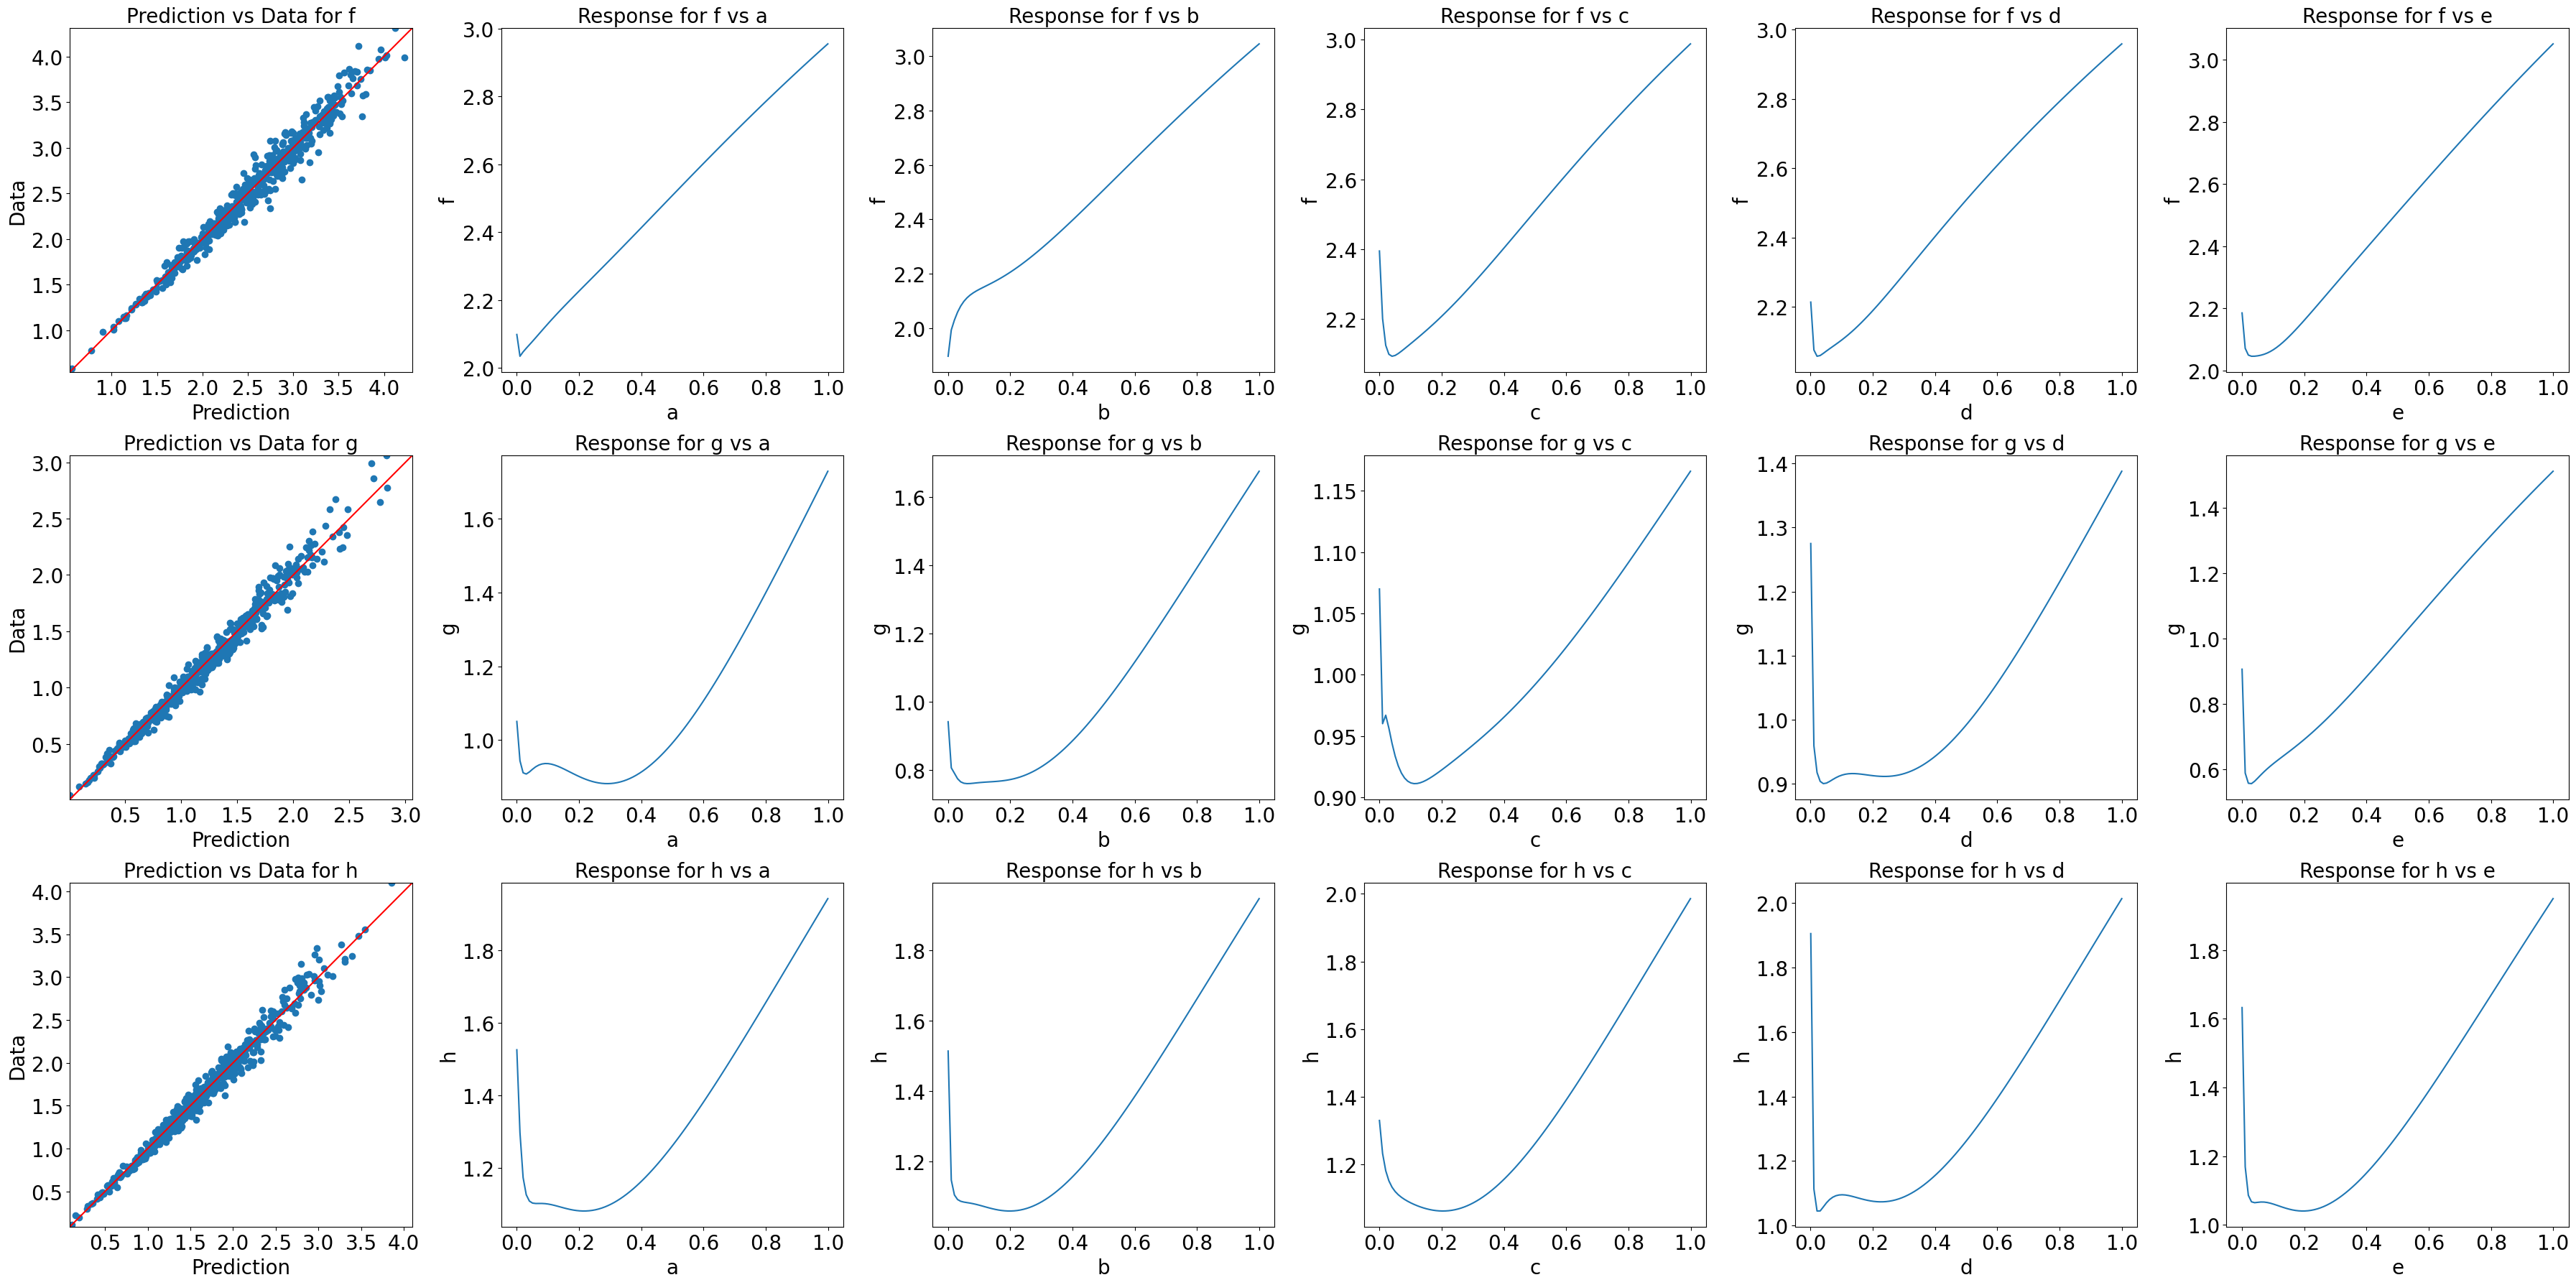

In [8]:
reg_plot.plot()

Create a regression plot using scaled data

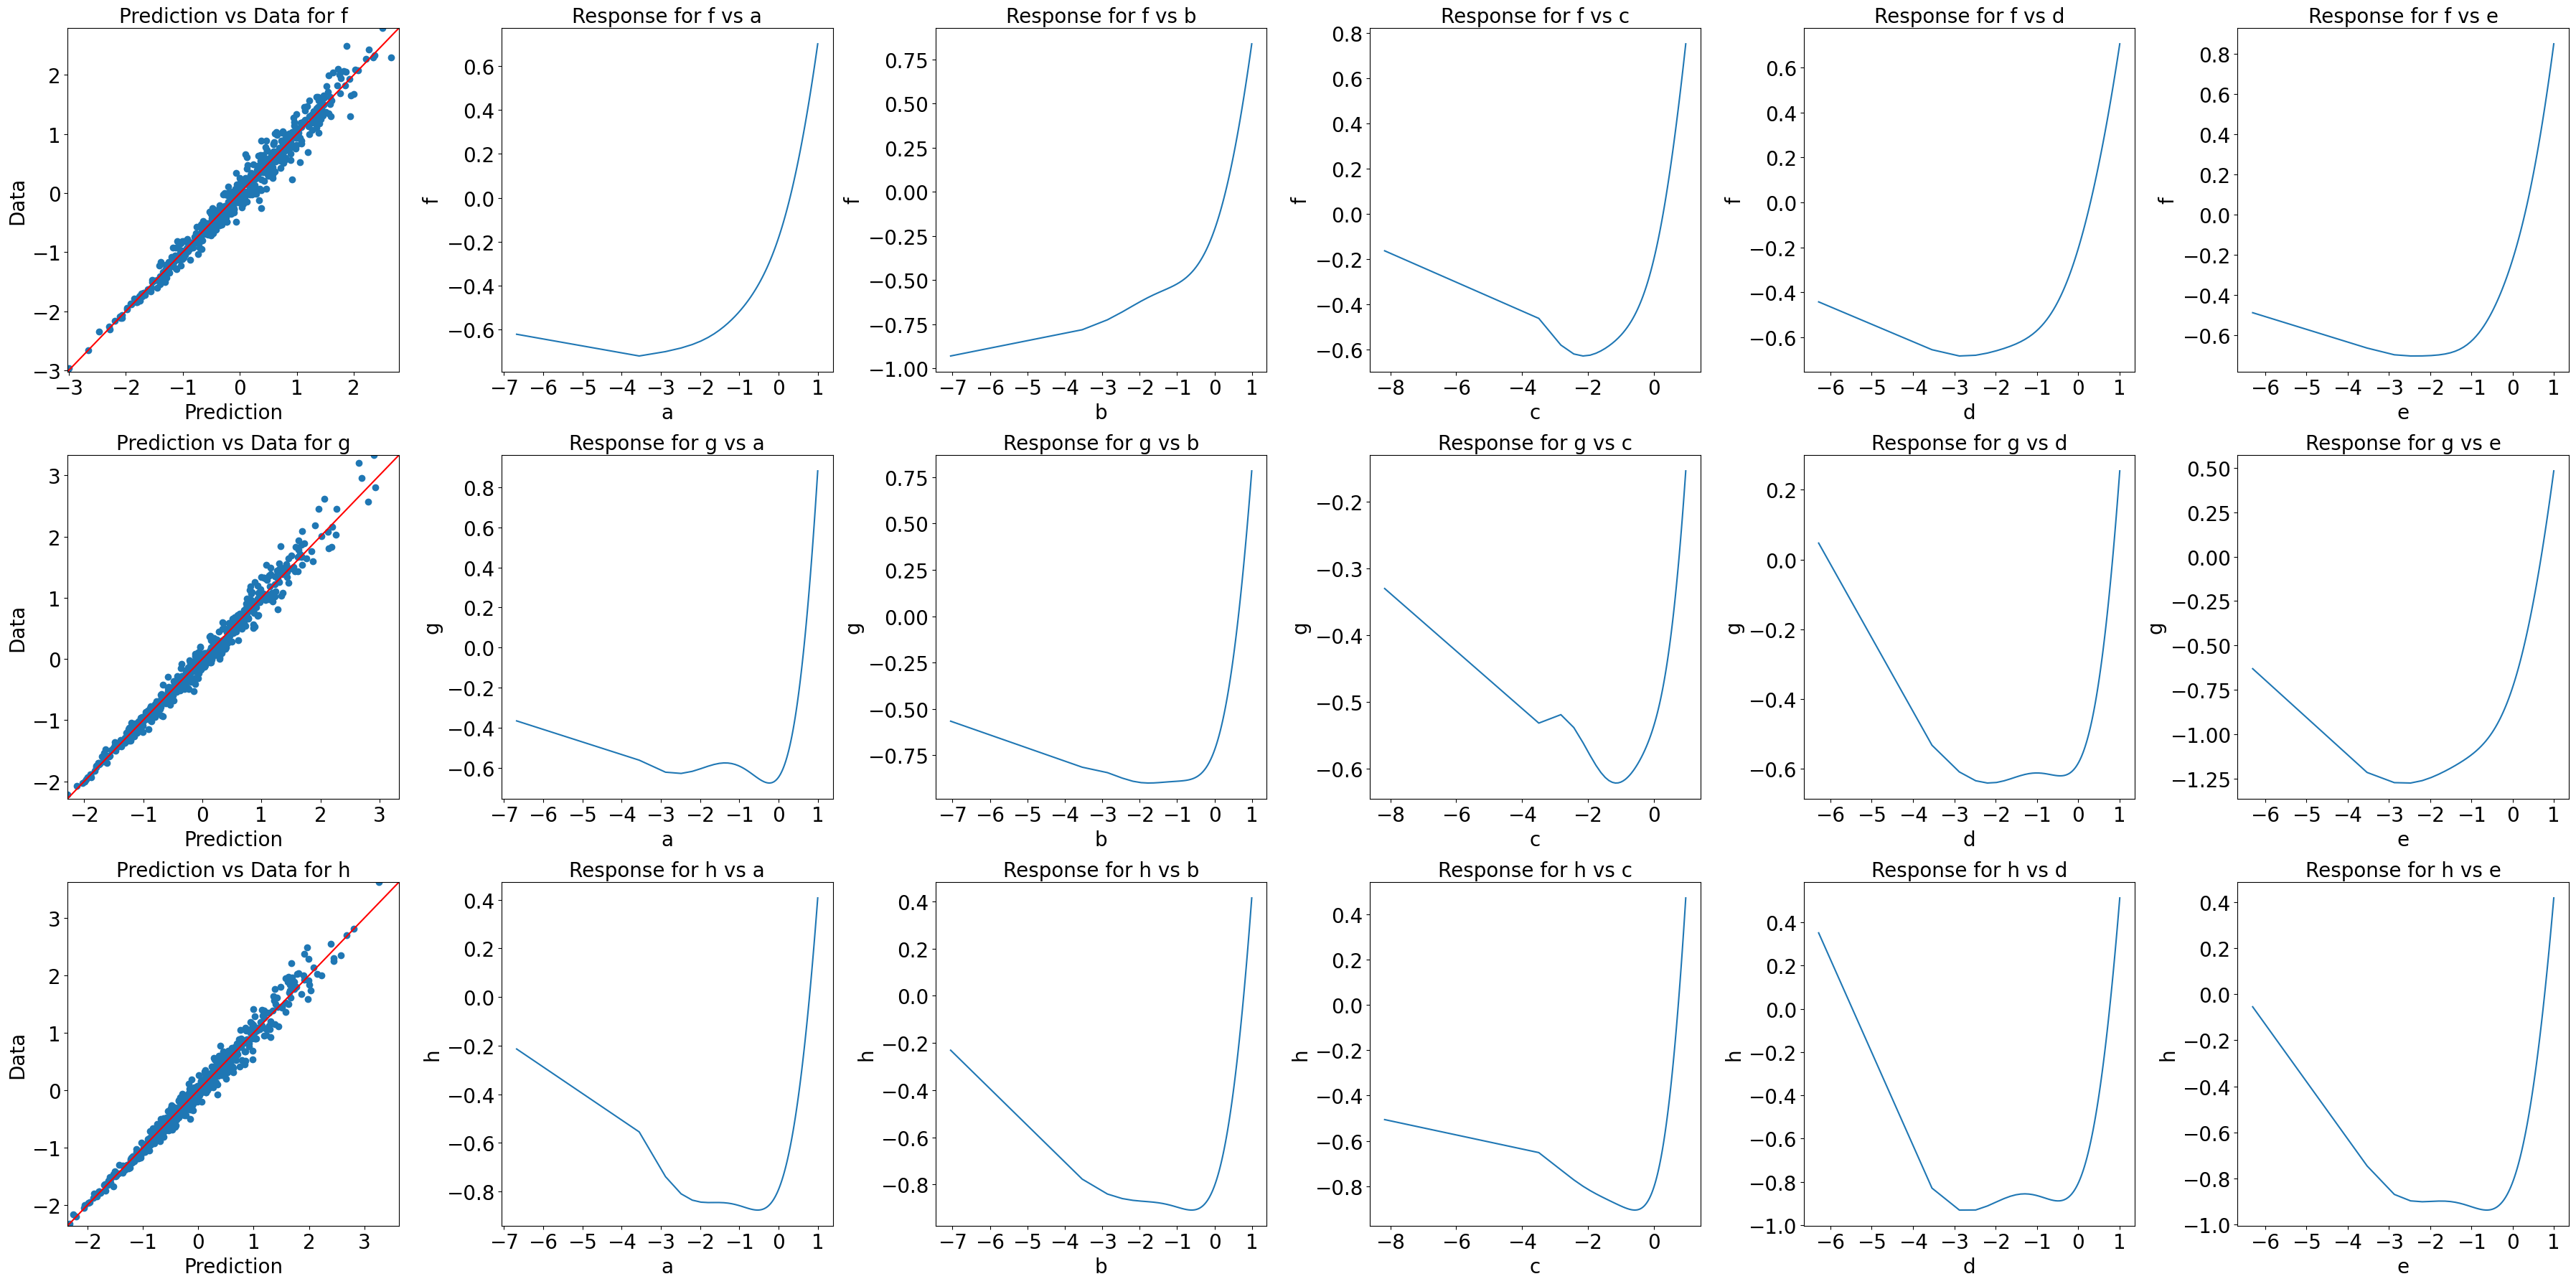

In [9]:
reg_plot.plot_scaled()

Lets try a different regressor and plot that to see how it compares

In [10]:
mlp_reg_data = MultiLayerPerceptronRegressionParameters(input_data=input_data, output_data=noisy_output_data)

mlp_regressor = MultiLayerPerceptronRegressor(mlp_reg_data)
mlp_regressor.fit()
print(f"Error: {mlp_regressor.error_metrics()['score']}")

params = RegressorPlotParameters(mlp_regressor, start, lower_bound, upper_bound)

reg_plot = RegressorPlot(params)

Error: 0.9501438418959501


/home/wheymann/mambaforge/envs/gumps_311/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/wheymann/mambaforge/envs/gumps_311/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


Create a new graph

/home/wheymann/mambaforge/envs/gumps_311/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/home/wheymann/mambaforge/envs/gumps_311/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/home/wheymann/mambaforge/envs/gumps_311/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/home/wheymann/mambaforge/envs/gumps_311/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/home/wheymann/mambaforge/envs/gumps_311/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/home/wheymann/mambaforge/envs/gumps_311

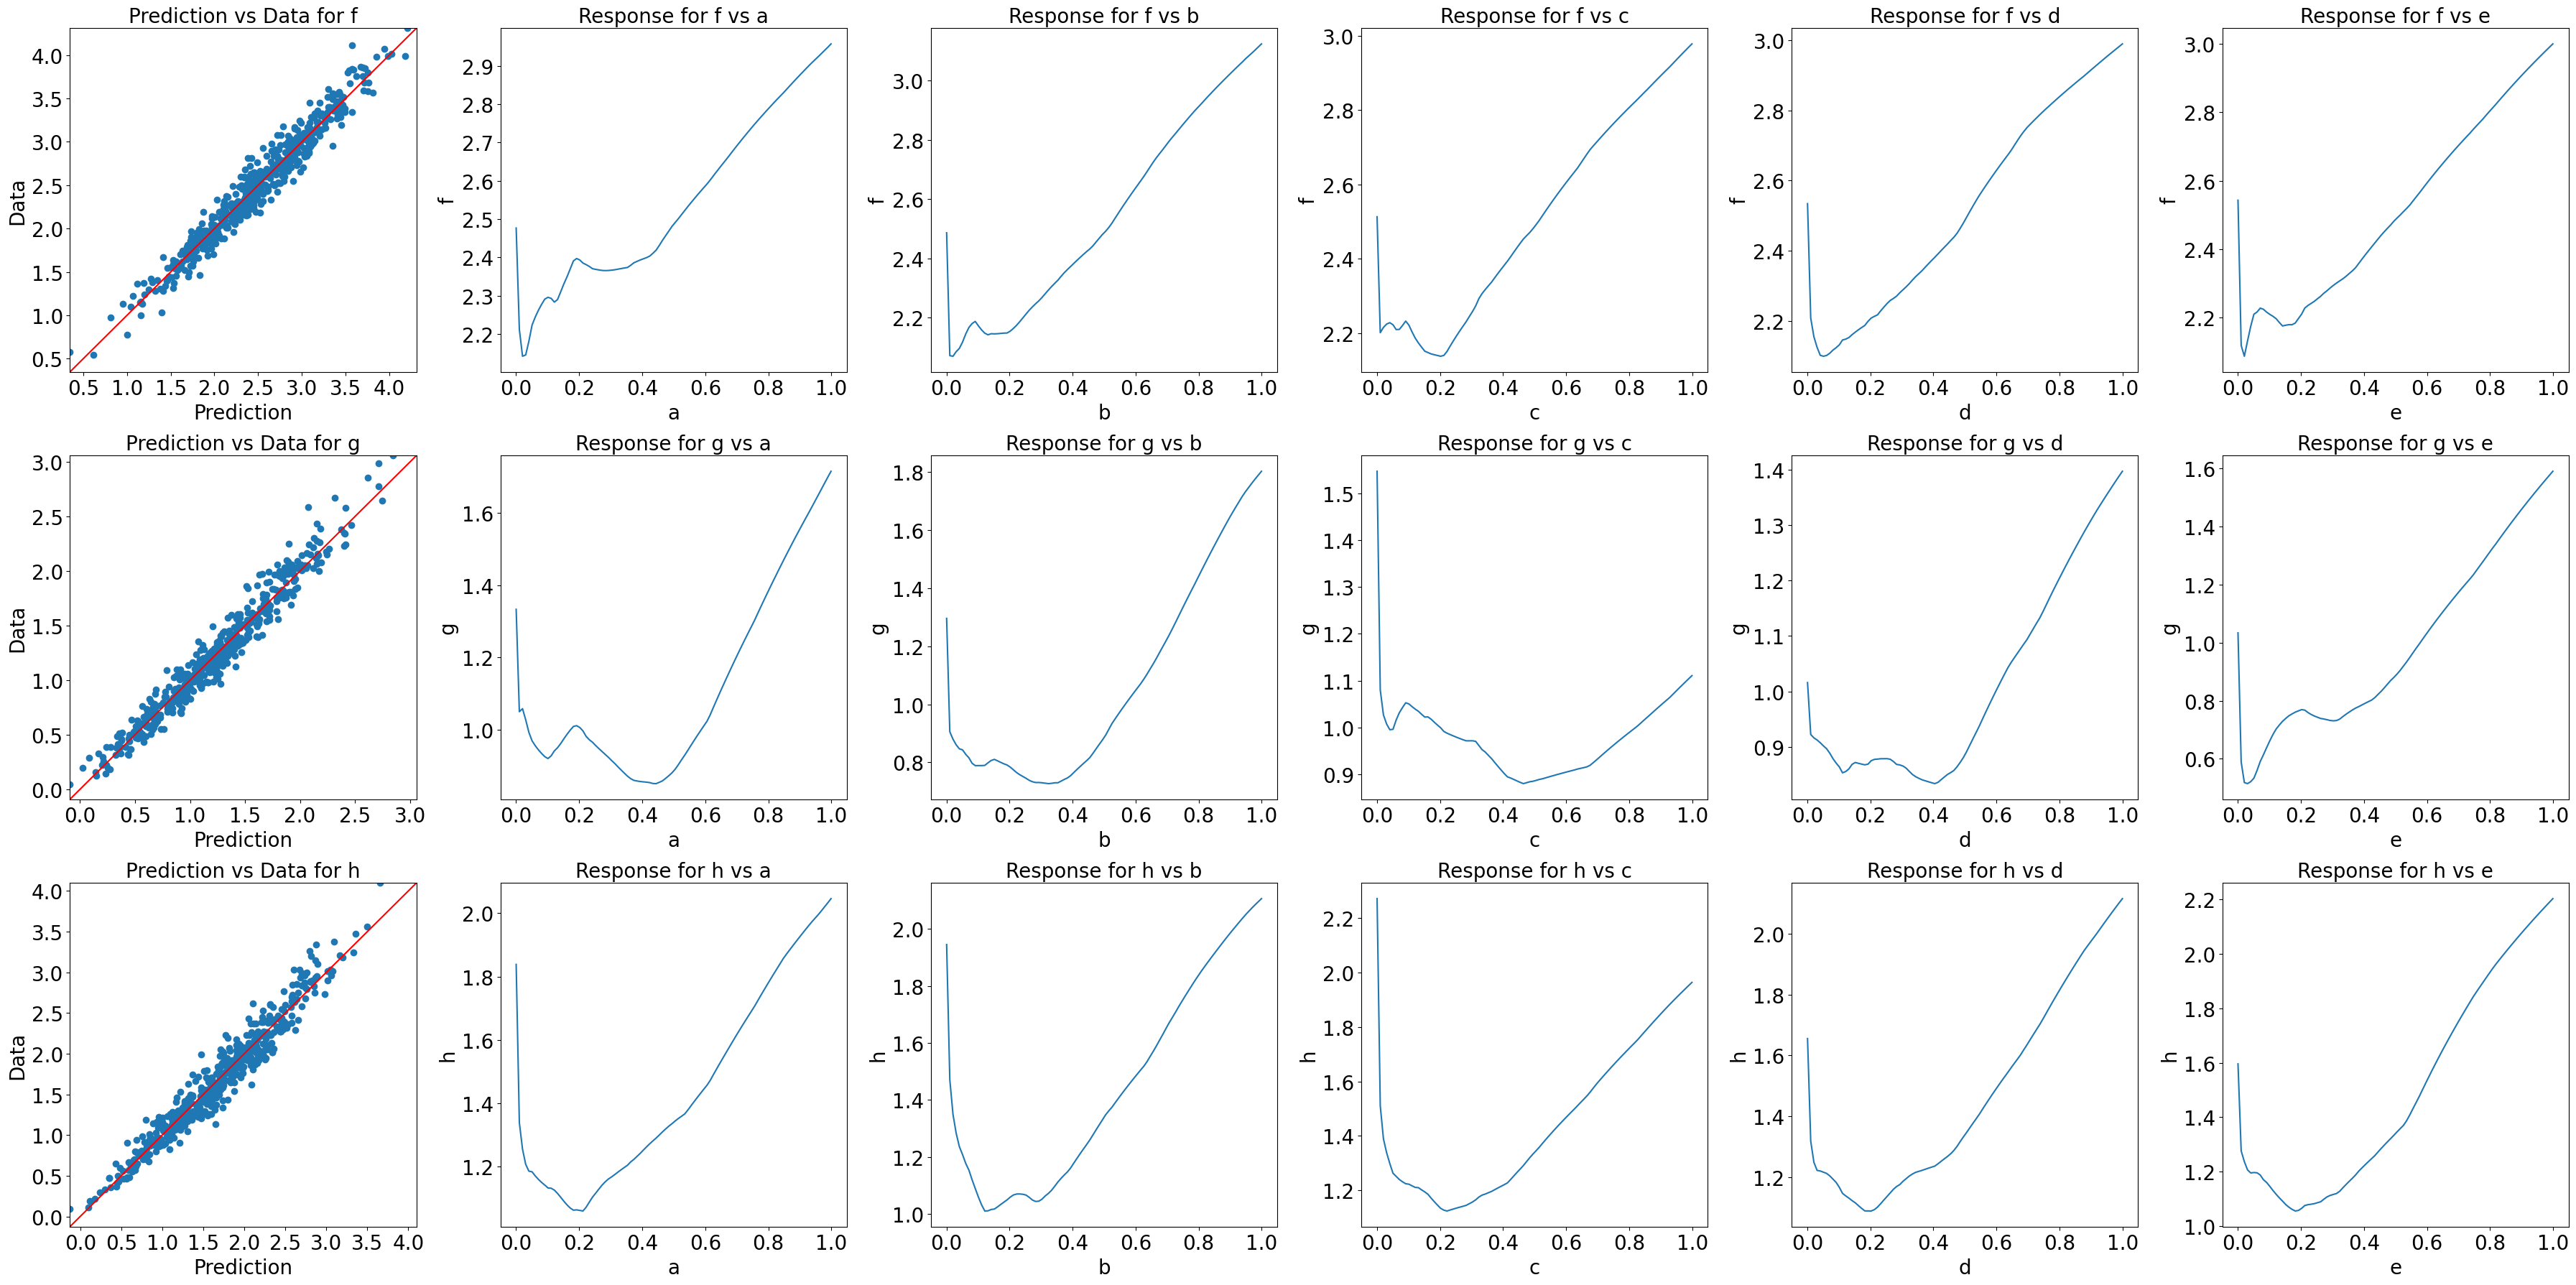

In [11]:
reg_plot.plot()

Clearly this is not very good, maybe the network is too complicated for this data

In [12]:
mlp_reg_data = MultiLayerPerceptronRegressionParameters(input_data=input_data, output_data=noisy_output_data, hidden_layer_sizes=(100, 100, 100, 100))

mlp_regressor = MultiLayerPerceptronRegressor(mlp_reg_data)
mlp_regressor.fit()
print(f"Error: {mlp_regressor.error_metrics()['score']}")

params = RegressorPlotParameters(mlp_regressor, start, lower_bound, upper_bound)

reg_plot = RegressorPlot(params)

Error: 0.9209872880394826


/home/wheymann/mambaforge/envs/gumps_311/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


Lets see how this looks now

/home/wheymann/mambaforge/envs/gumps_311/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/home/wheymann/mambaforge/envs/gumps_311/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/home/wheymann/mambaforge/envs/gumps_311/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/home/wheymann/mambaforge/envs/gumps_311/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/home/wheymann/mambaforge/envs/gumps_311/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/home/wheymann/mambaforge/envs/gumps_311

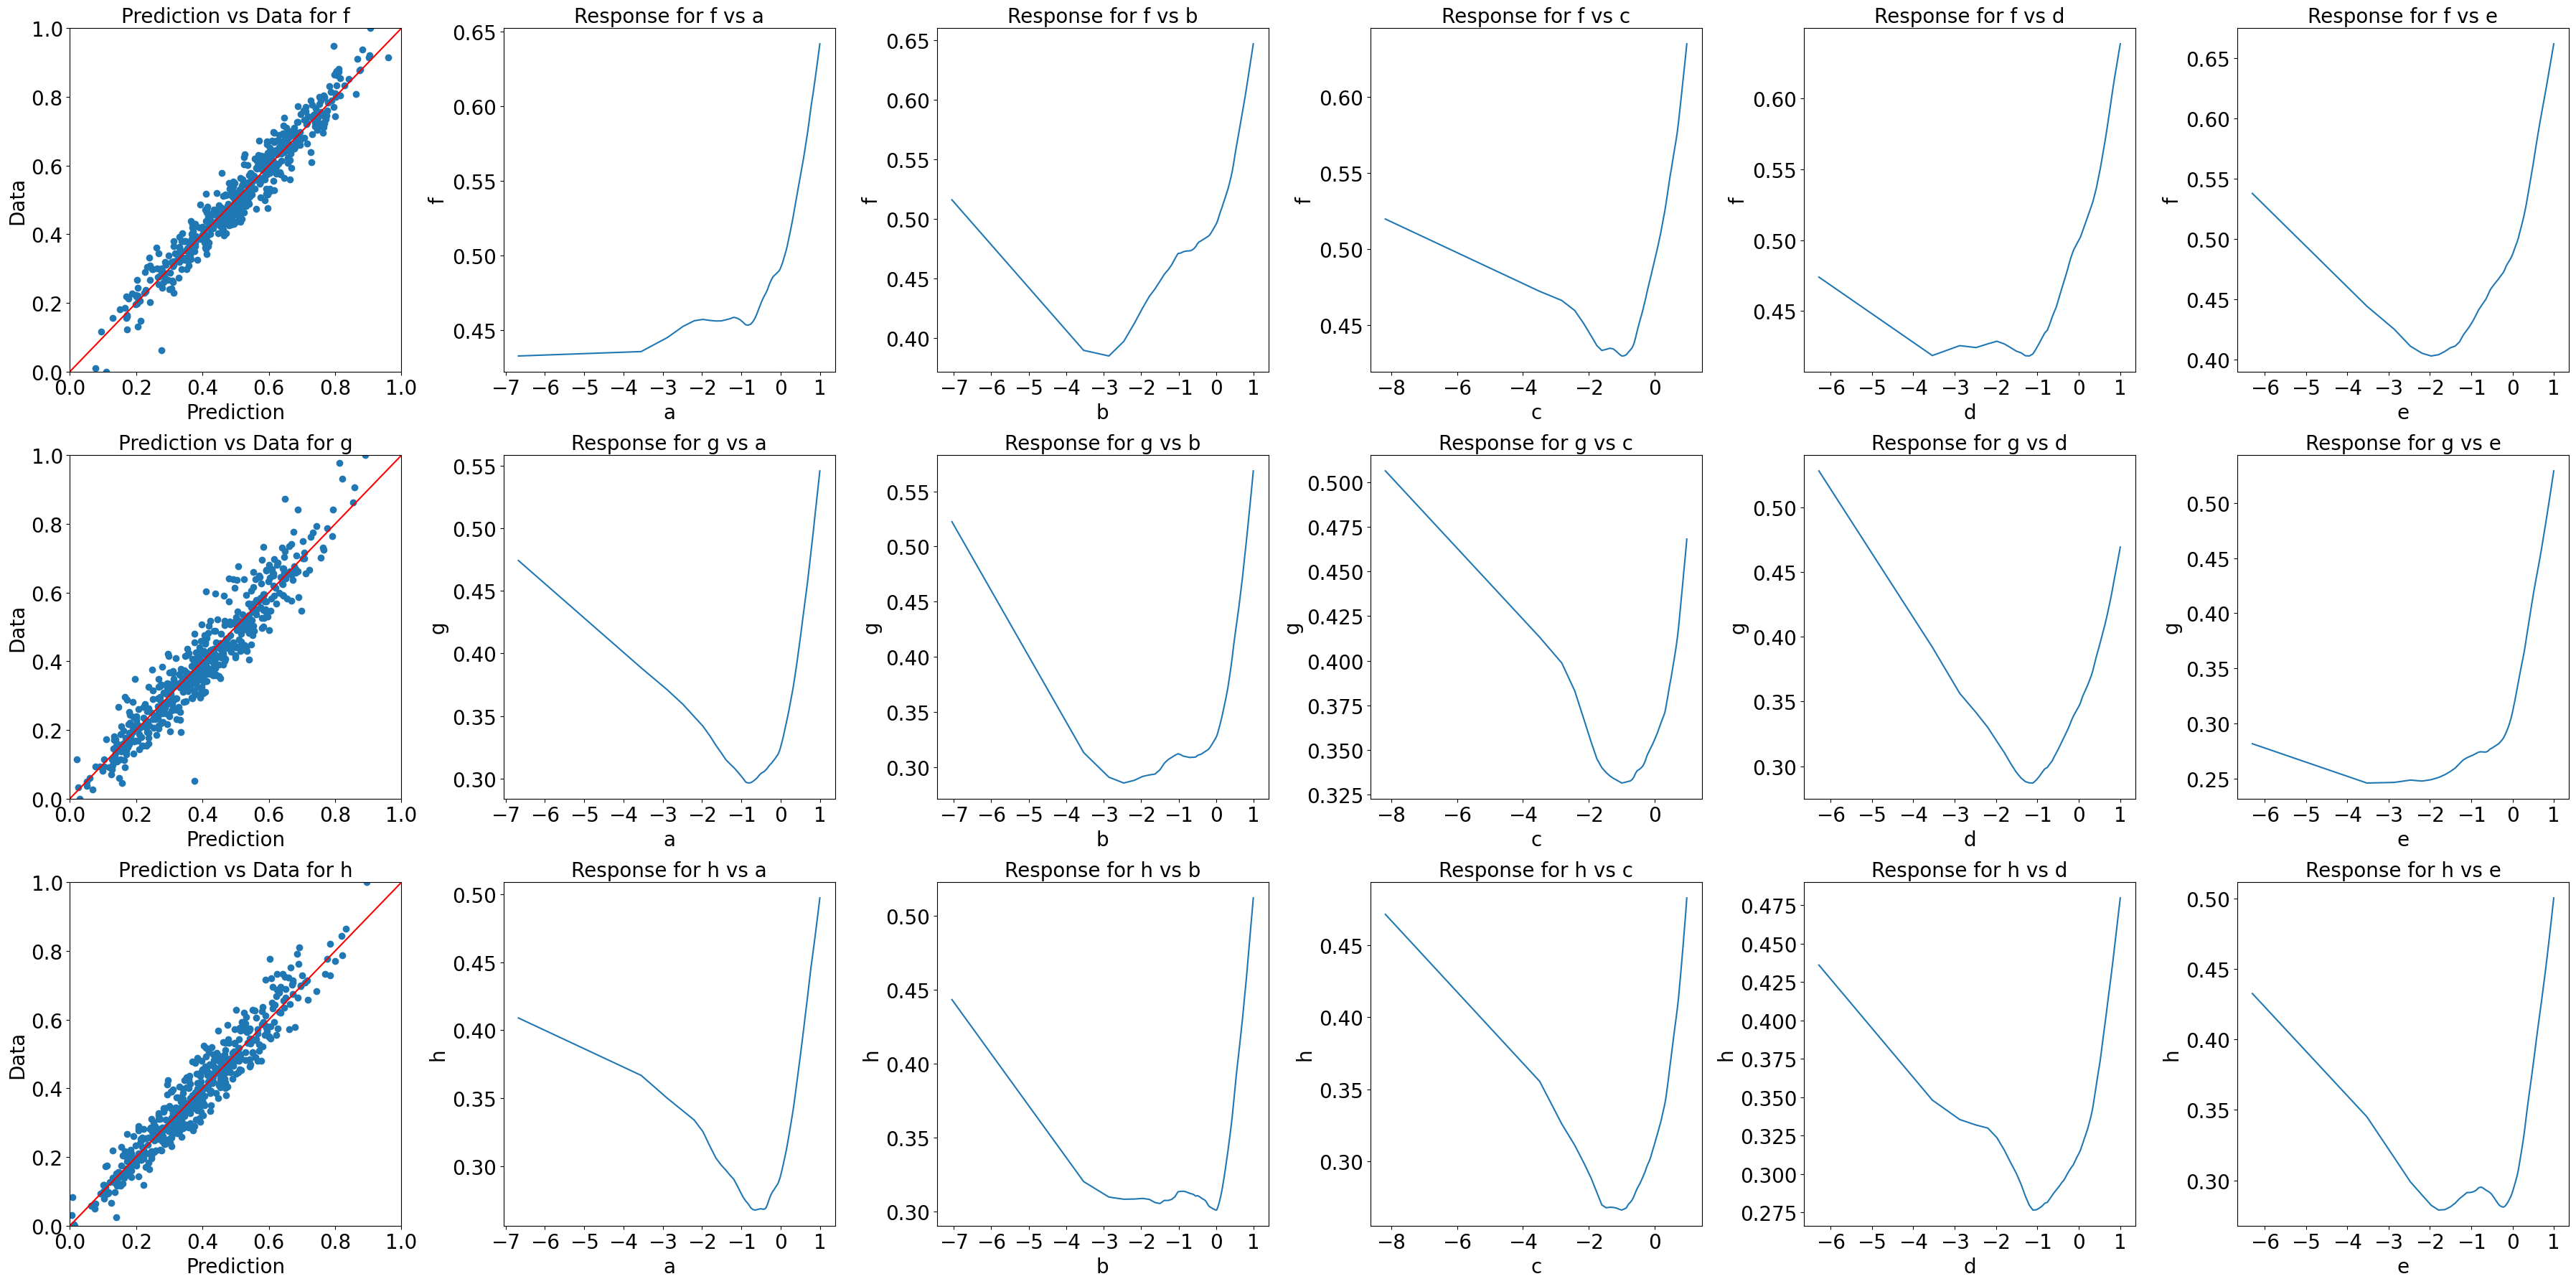

In [13]:
reg_plot.plot_scaled()

Maybe this model needs more data to train on

In [14]:
input_data_more = generate_synthetic_input(2048)
output_data_more = generate_synthetic_output(input_data_more)
noisy_input_data_more = add_noise(output_data_more)

mlp_reg_data = MultiLayerPerceptronRegressionParameters(input_data=input_data_more, output_data=noisy_input_data_more, hidden_layer_sizes=(200, 200))

mlp_regressor = MultiLayerPerceptronRegressor(mlp_reg_data)
mlp_regressor.fit()
print(f"Error: {mlp_regressor.error_metrics()['score']}")

params = RegressorPlotParameters(mlp_regressor, start, lower_bound, upper_bound)

reg_plot = RegressorPlot(params)

Error: 0.9760021352590993


/home/wheymann/mambaforge/envs/gumps_311/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


Lets see how this does

/home/wheymann/mambaforge/envs/gumps_311/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/home/wheymann/mambaforge/envs/gumps_311/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/home/wheymann/mambaforge/envs/gumps_311/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/home/wheymann/mambaforge/envs/gumps_311/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/home/wheymann/mambaforge/envs/gumps_311/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/home/wheymann/mambaforge/envs/gumps_311

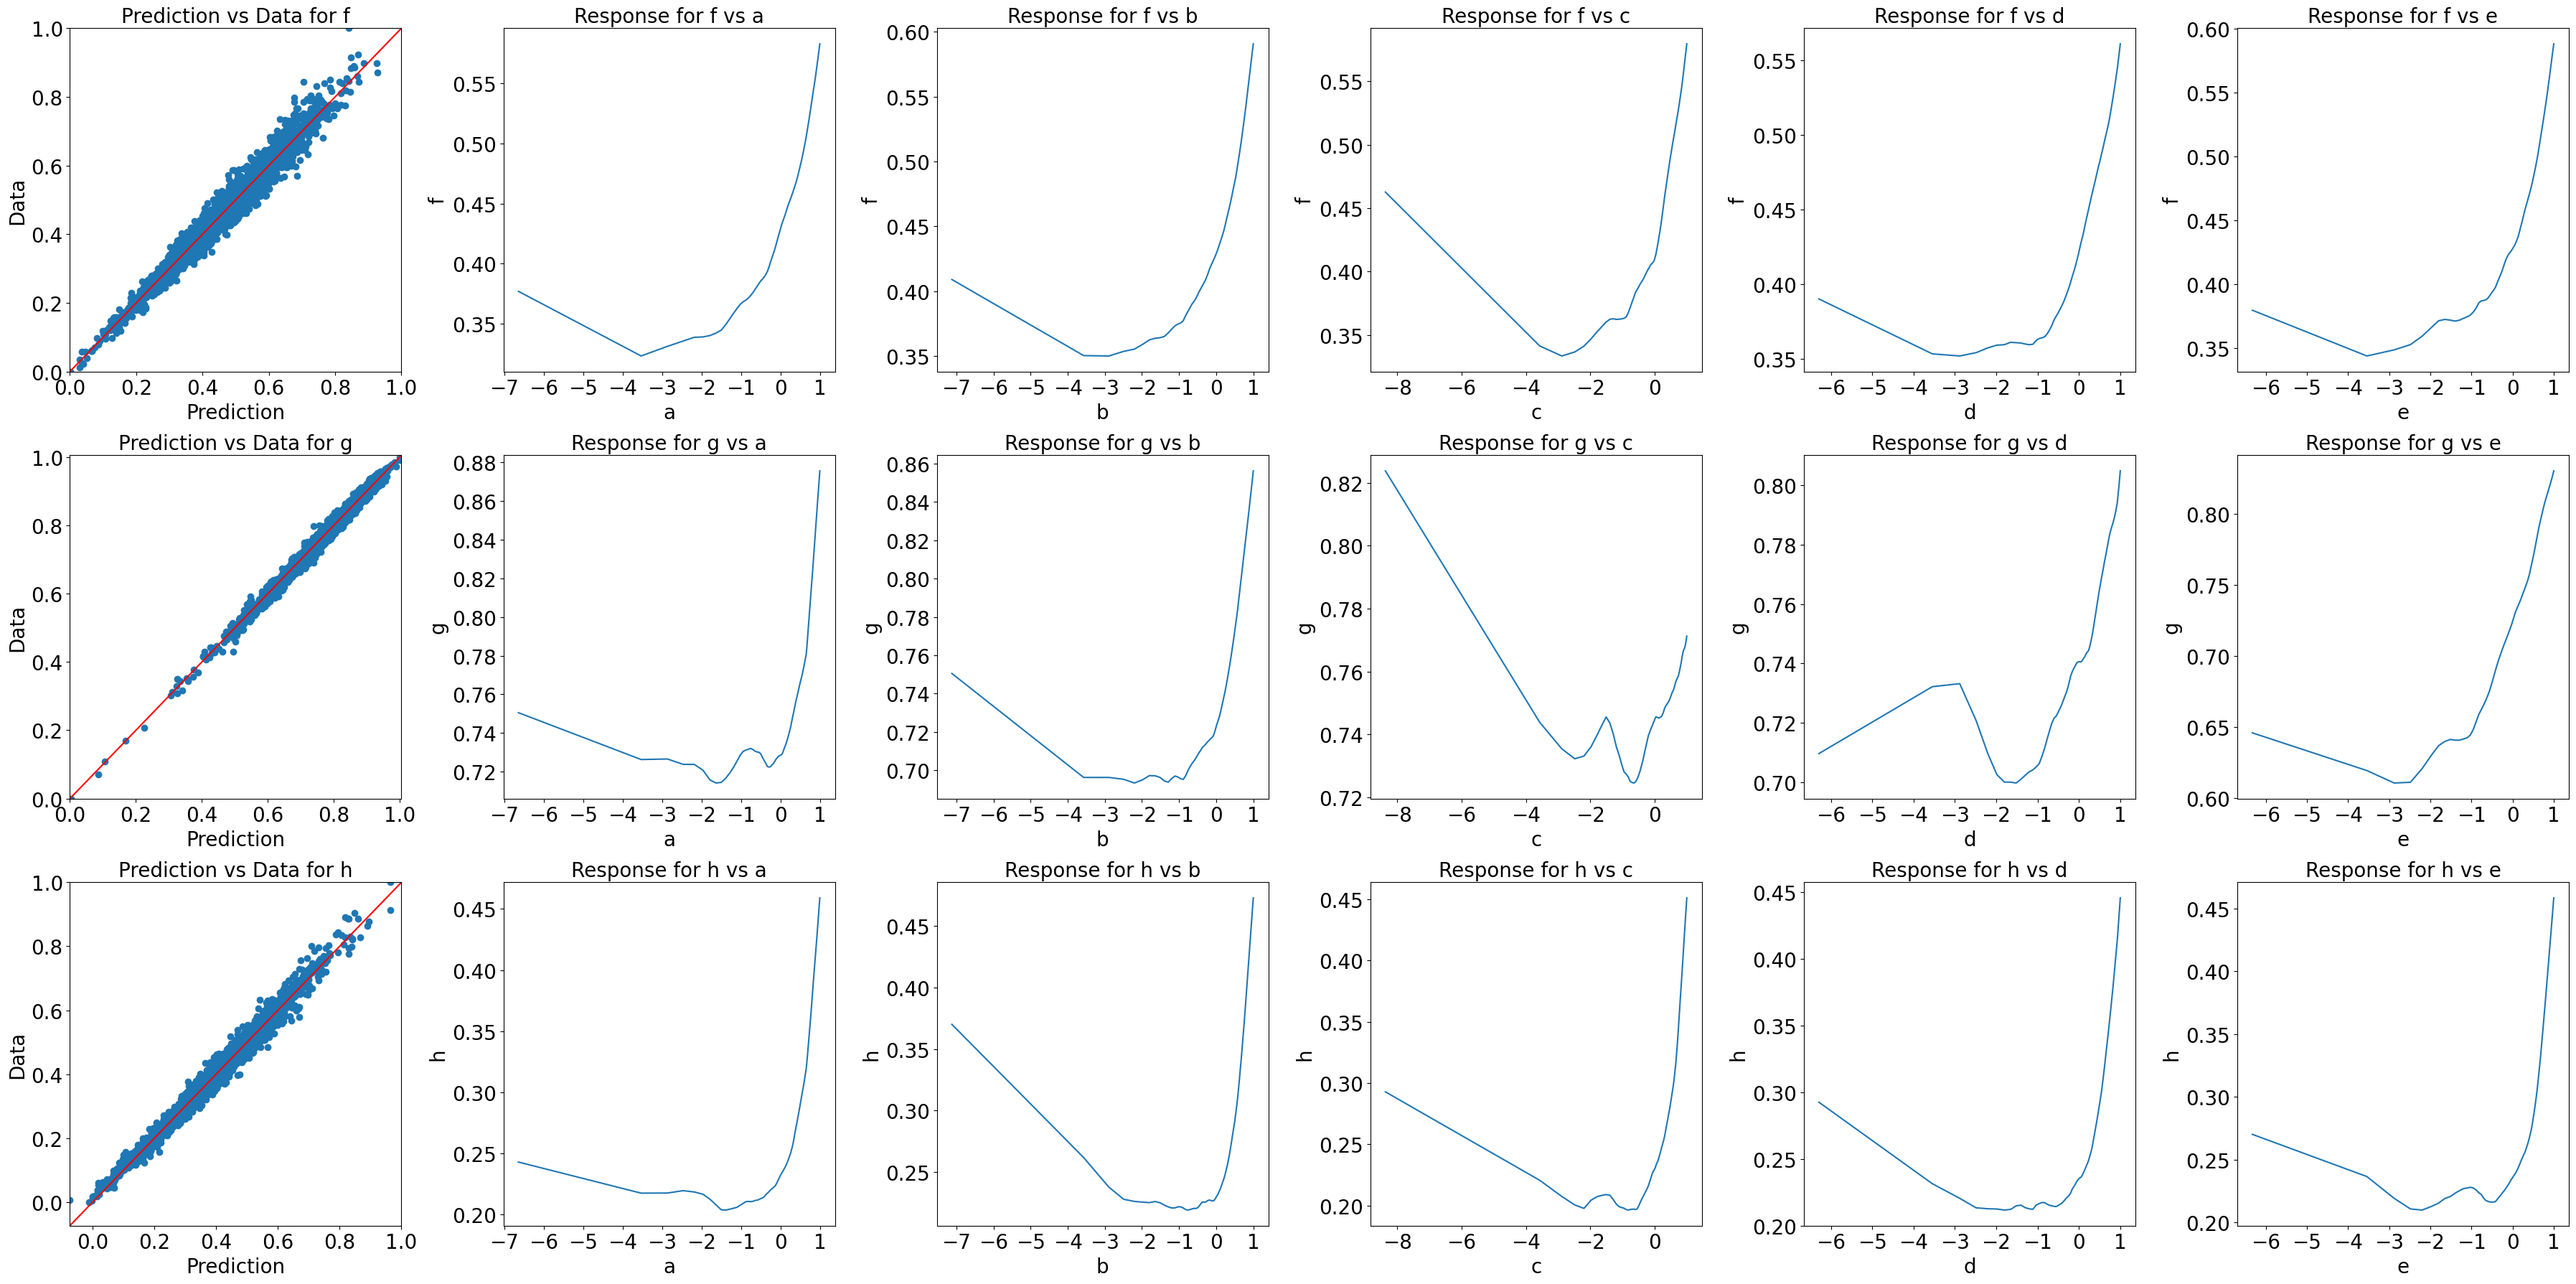

In [15]:
reg_plot.plot_scaled()

Just adding data and minor changes to the model still results in a noisy approximation. This model is either not appropriate or it needs more tuning. 

Graphs like this make it easier to determine that.

pyTorch Multi-Layer Perceptron regressor

In [16]:
mlp_reg_data = TorchMultiLayerPerceptronRegressionParameters(input_data=input_data, 
                                        output_data=output_data,
                                        learning_rate="adaptive",
                                        hidden_layer_sizes=(100, 100, 100),
                                        learning_rate_patience=50)

mlp_regressor = TorchMultiLayerPerceptronRegressor(mlp_reg_data)
mlp_regressor.fit()
print(f"Error: {mlp_regressor.error_metrics()['score']}")

params = RegressorPlotParameters(mlp_regressor, start, lower_bound, upper_bound)

reg_plot = RegressorPlot(params)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name    | Type       | Params
---------------------------------------
0 | loss_fn | MSELoss    | 0     
1 | model   | Sequential | 21.1 K
---------------------------------------
21.1 K    Trainable params
0         Non-trainable params
21.1 K    Total params
0.084     Total estimated model params size (MB)


/home/wheymann/mambaforge/envs/gumps_311/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
/home/wheymann/mambaforge/envs/gumps_311/lib/python3.11/site-packages/pytorch_lightning/core/module.py:491: You called `self.log('val_loss', ..., logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`
/home/wheymann/mambaforge/envs/gumps_311/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.


Epoch 0:  59%|█████▊    | 17/29 [00:00<00:00, 190.65it/s]

/home/wheymann/mambaforge/envs/gumps_311/lib/python3.11/site-packages/pytorch_lightning/core/module.py:491: You called `self.log('train_loss', ..., logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`


Epoch 102: 100%|██████████| 29/29 [00:00<00:00, 159.96it/s, val_loss=0.000202, train_loss=0.000143]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: /home/wheymann/repos/GUMPS/examples/lightning_logs
/home/wheymann/mambaforge/envs/gumps_311/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 32/32 [00:00<00:00, 614.31it/s]
Error: 0.9945697581713713


And visualize the regressor

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wheymann/mambaforge/envs/gumps_311/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.


Predicting:   0%|          | 0/32 [00:00<?, ?it/s]

Predicting DataLoader 0: 100%|██████████| 32/32 [00:00<00:00, 537.81it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wheymann/mambaforge/envs/gumps_311/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 503.51it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wheymann/mambaforge/envs/gumps_311/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.



Predicting DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 506.98it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wheymann/mambaforge/envs/gumps_311/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 539.78it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


/home/wheymann/mambaforge/envs/gumps_311/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 533.45it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


/home/wheymann/mambaforge/envs/gumps_311/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 445.48it/s]


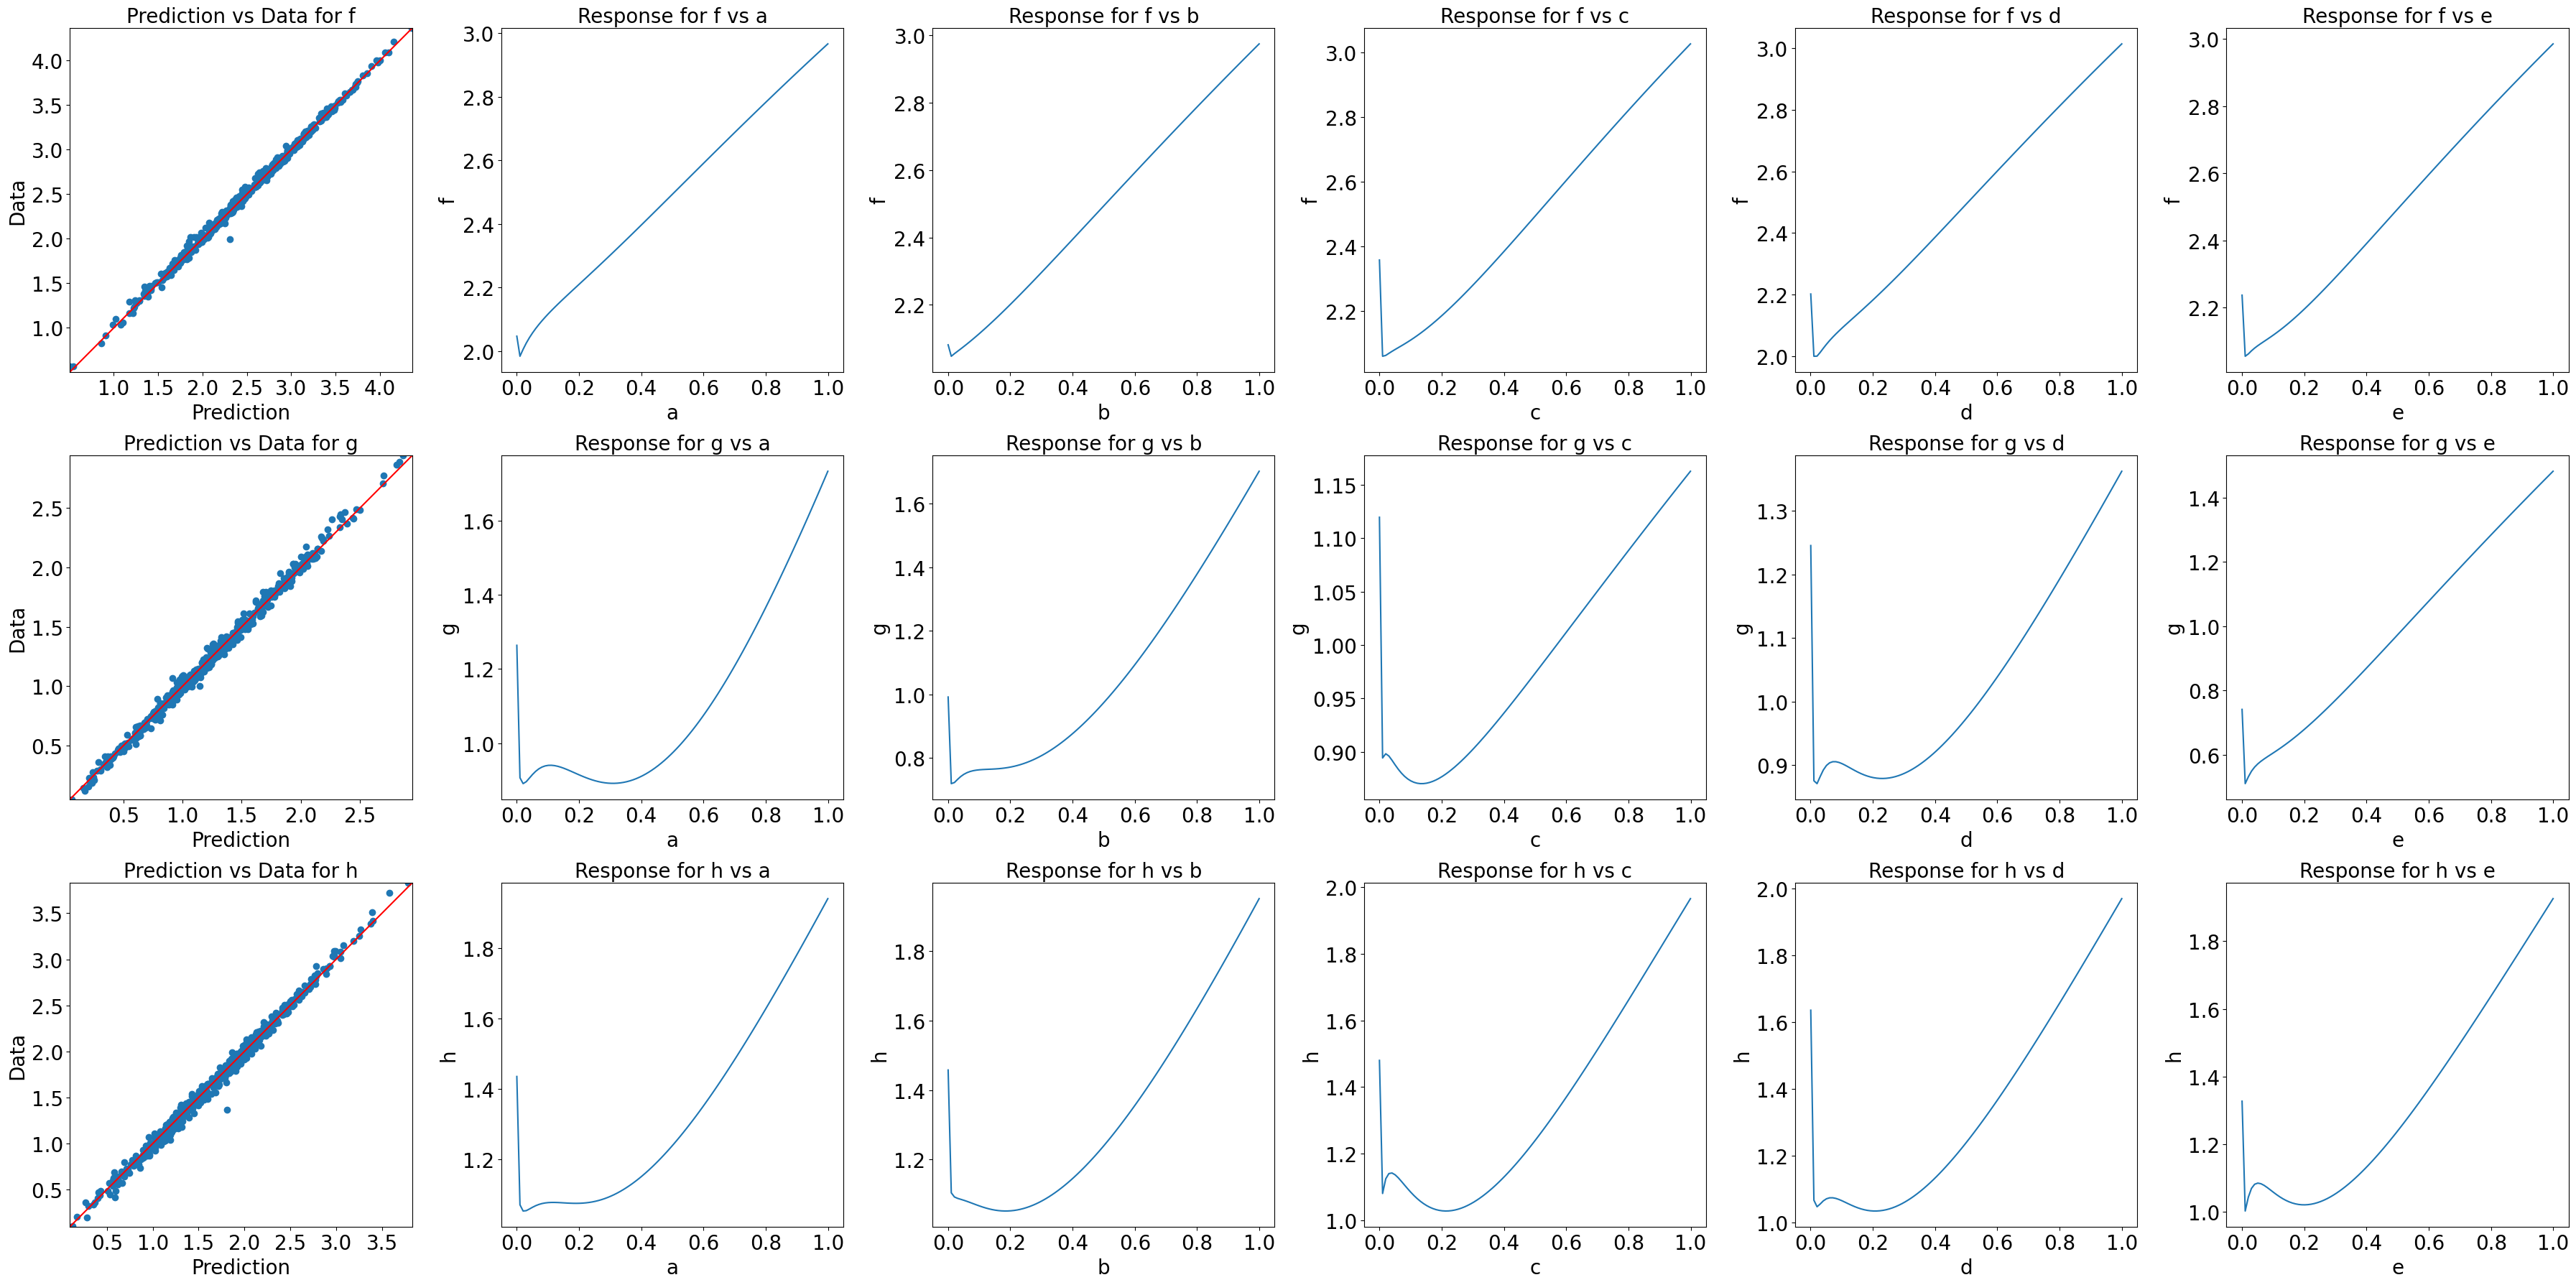

In [17]:
reg_plot.plot()

<Axes: >

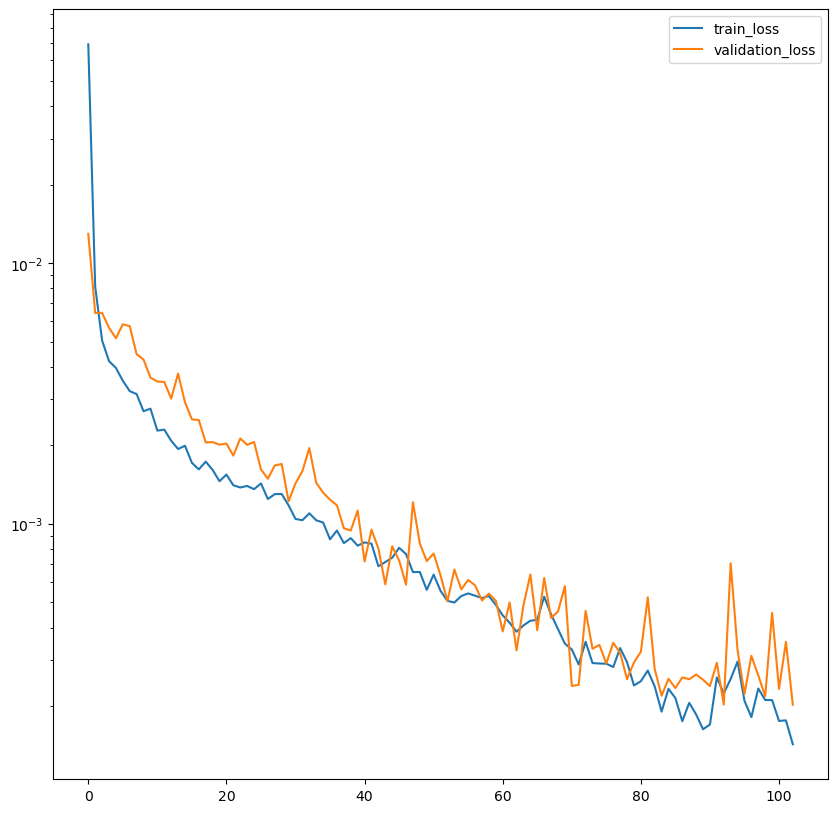

In [18]:
mlp_regressor.plot_loss_curves()

Linear

Error: 0.6142604784121078


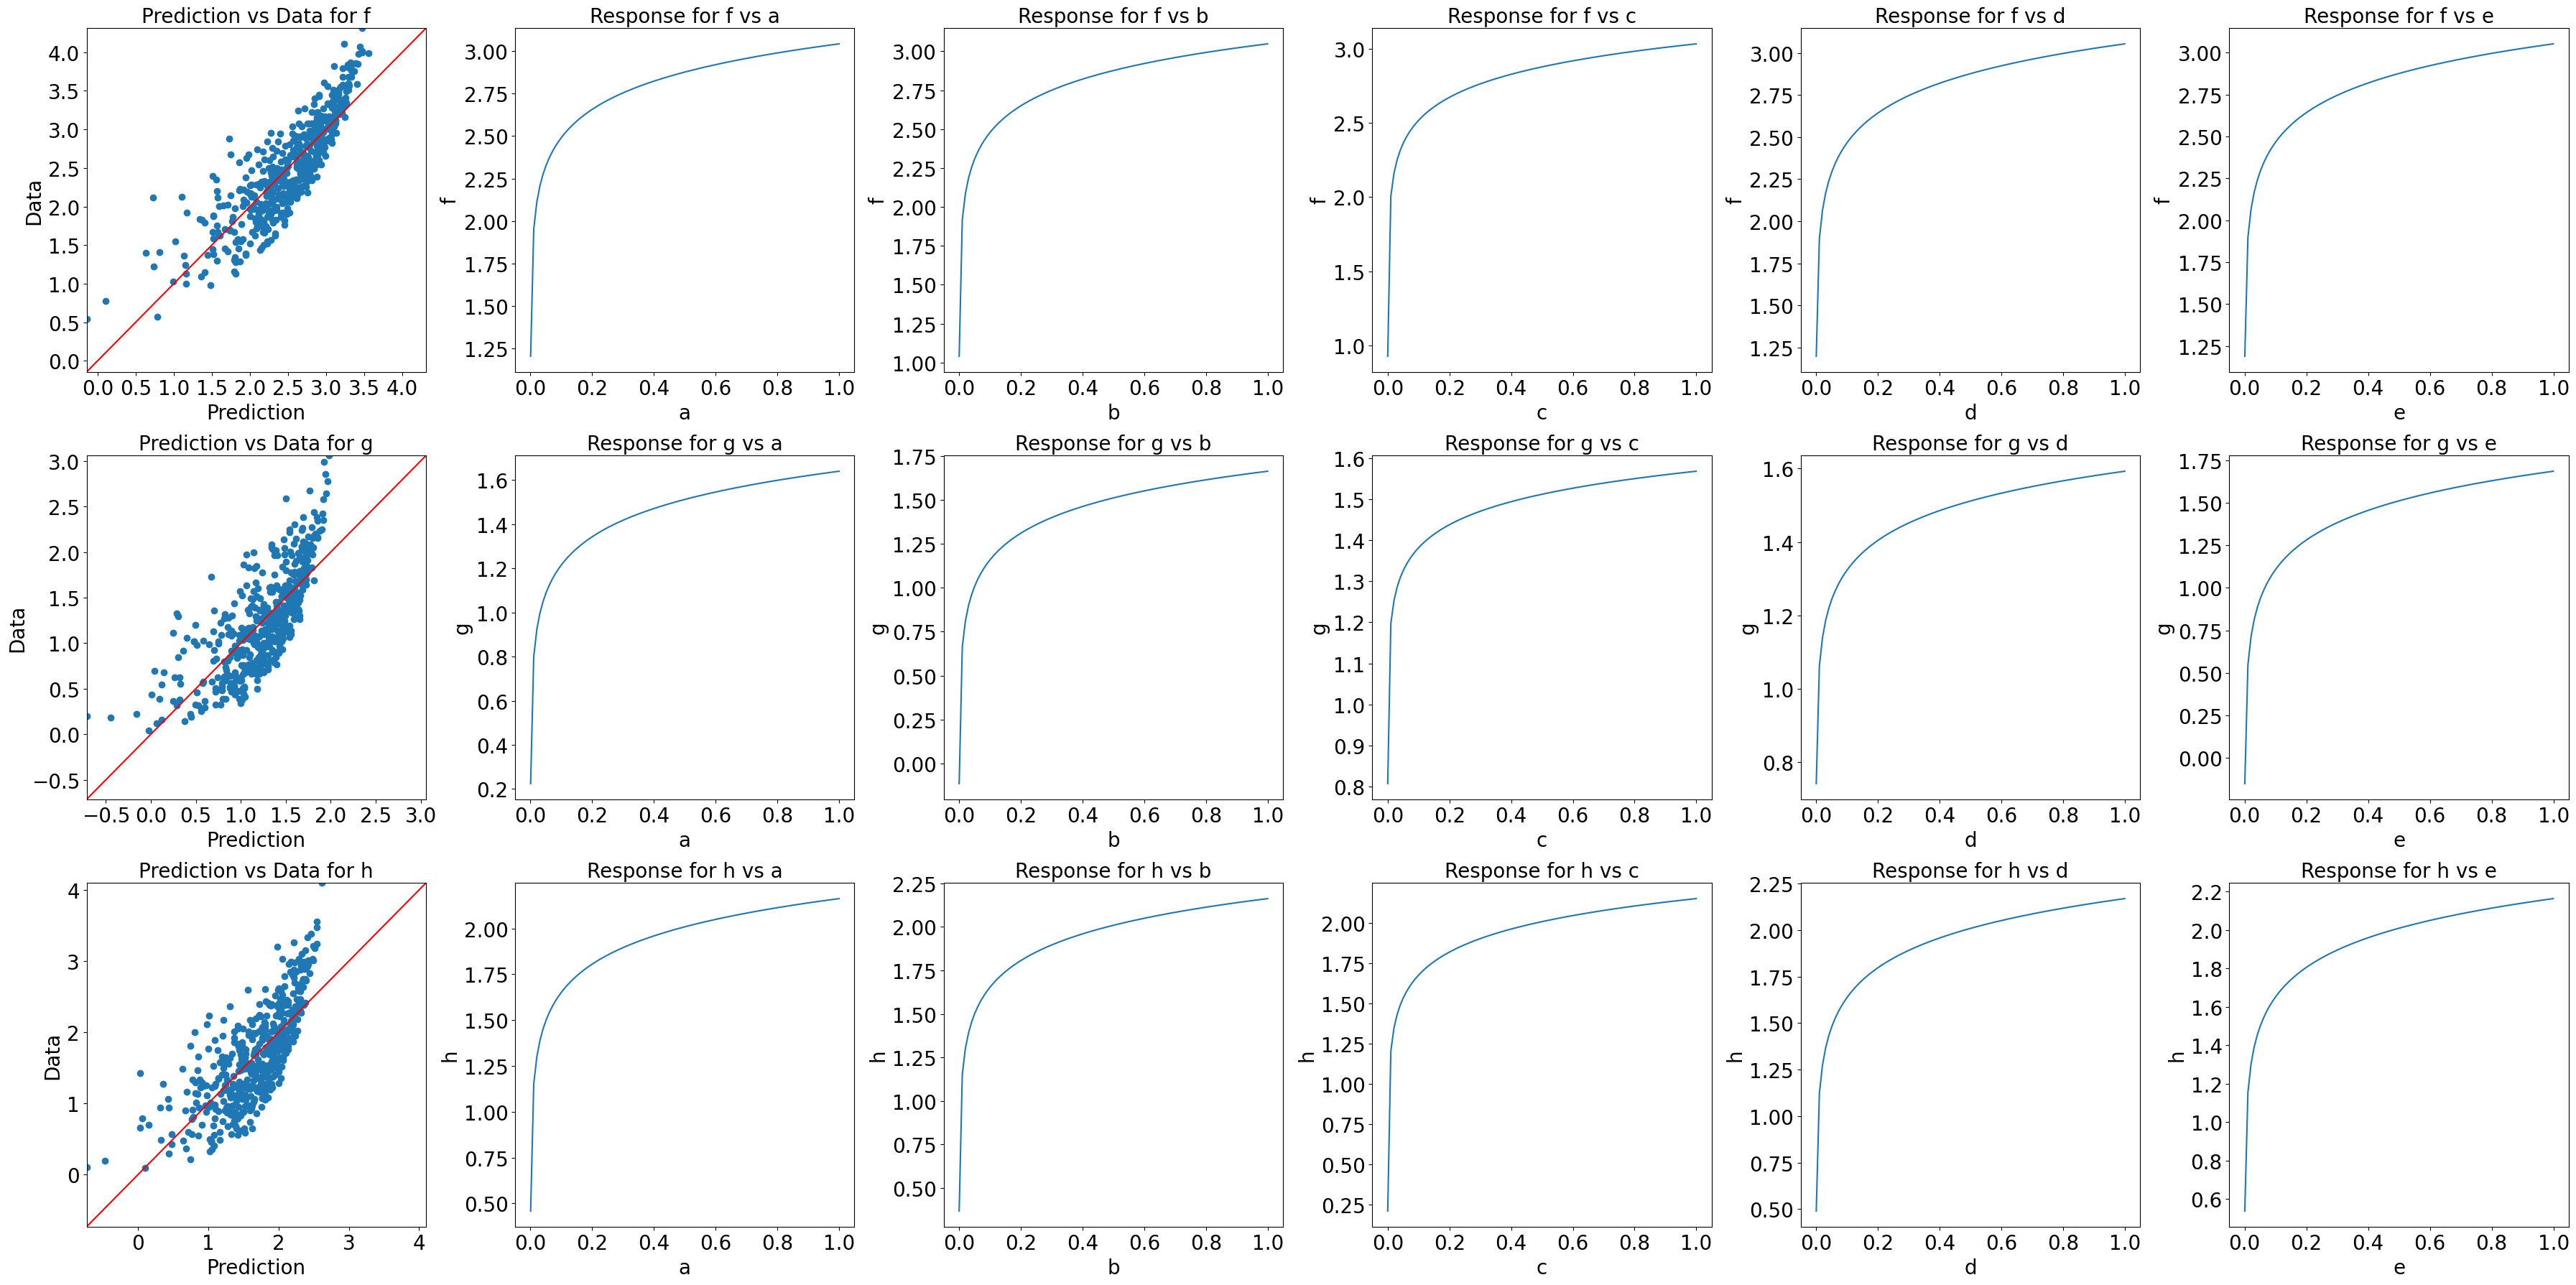

In [19]:
reg_data = PolynomialRegressionParameters(input_data=input_data, output_data=noisy_output_data, order=1)

regressor = PolynomialRegressor(reg_data)
regressor.fit()
print(f"Error: {regressor.error_metrics()['score']}")

params = RegressorPlotParameters(regressor, start, lower_bound, upper_bound)

reg_plot = RegressorPlot(params)

reg_plot.plot()

Quadratic

Error: 0.829843322572446


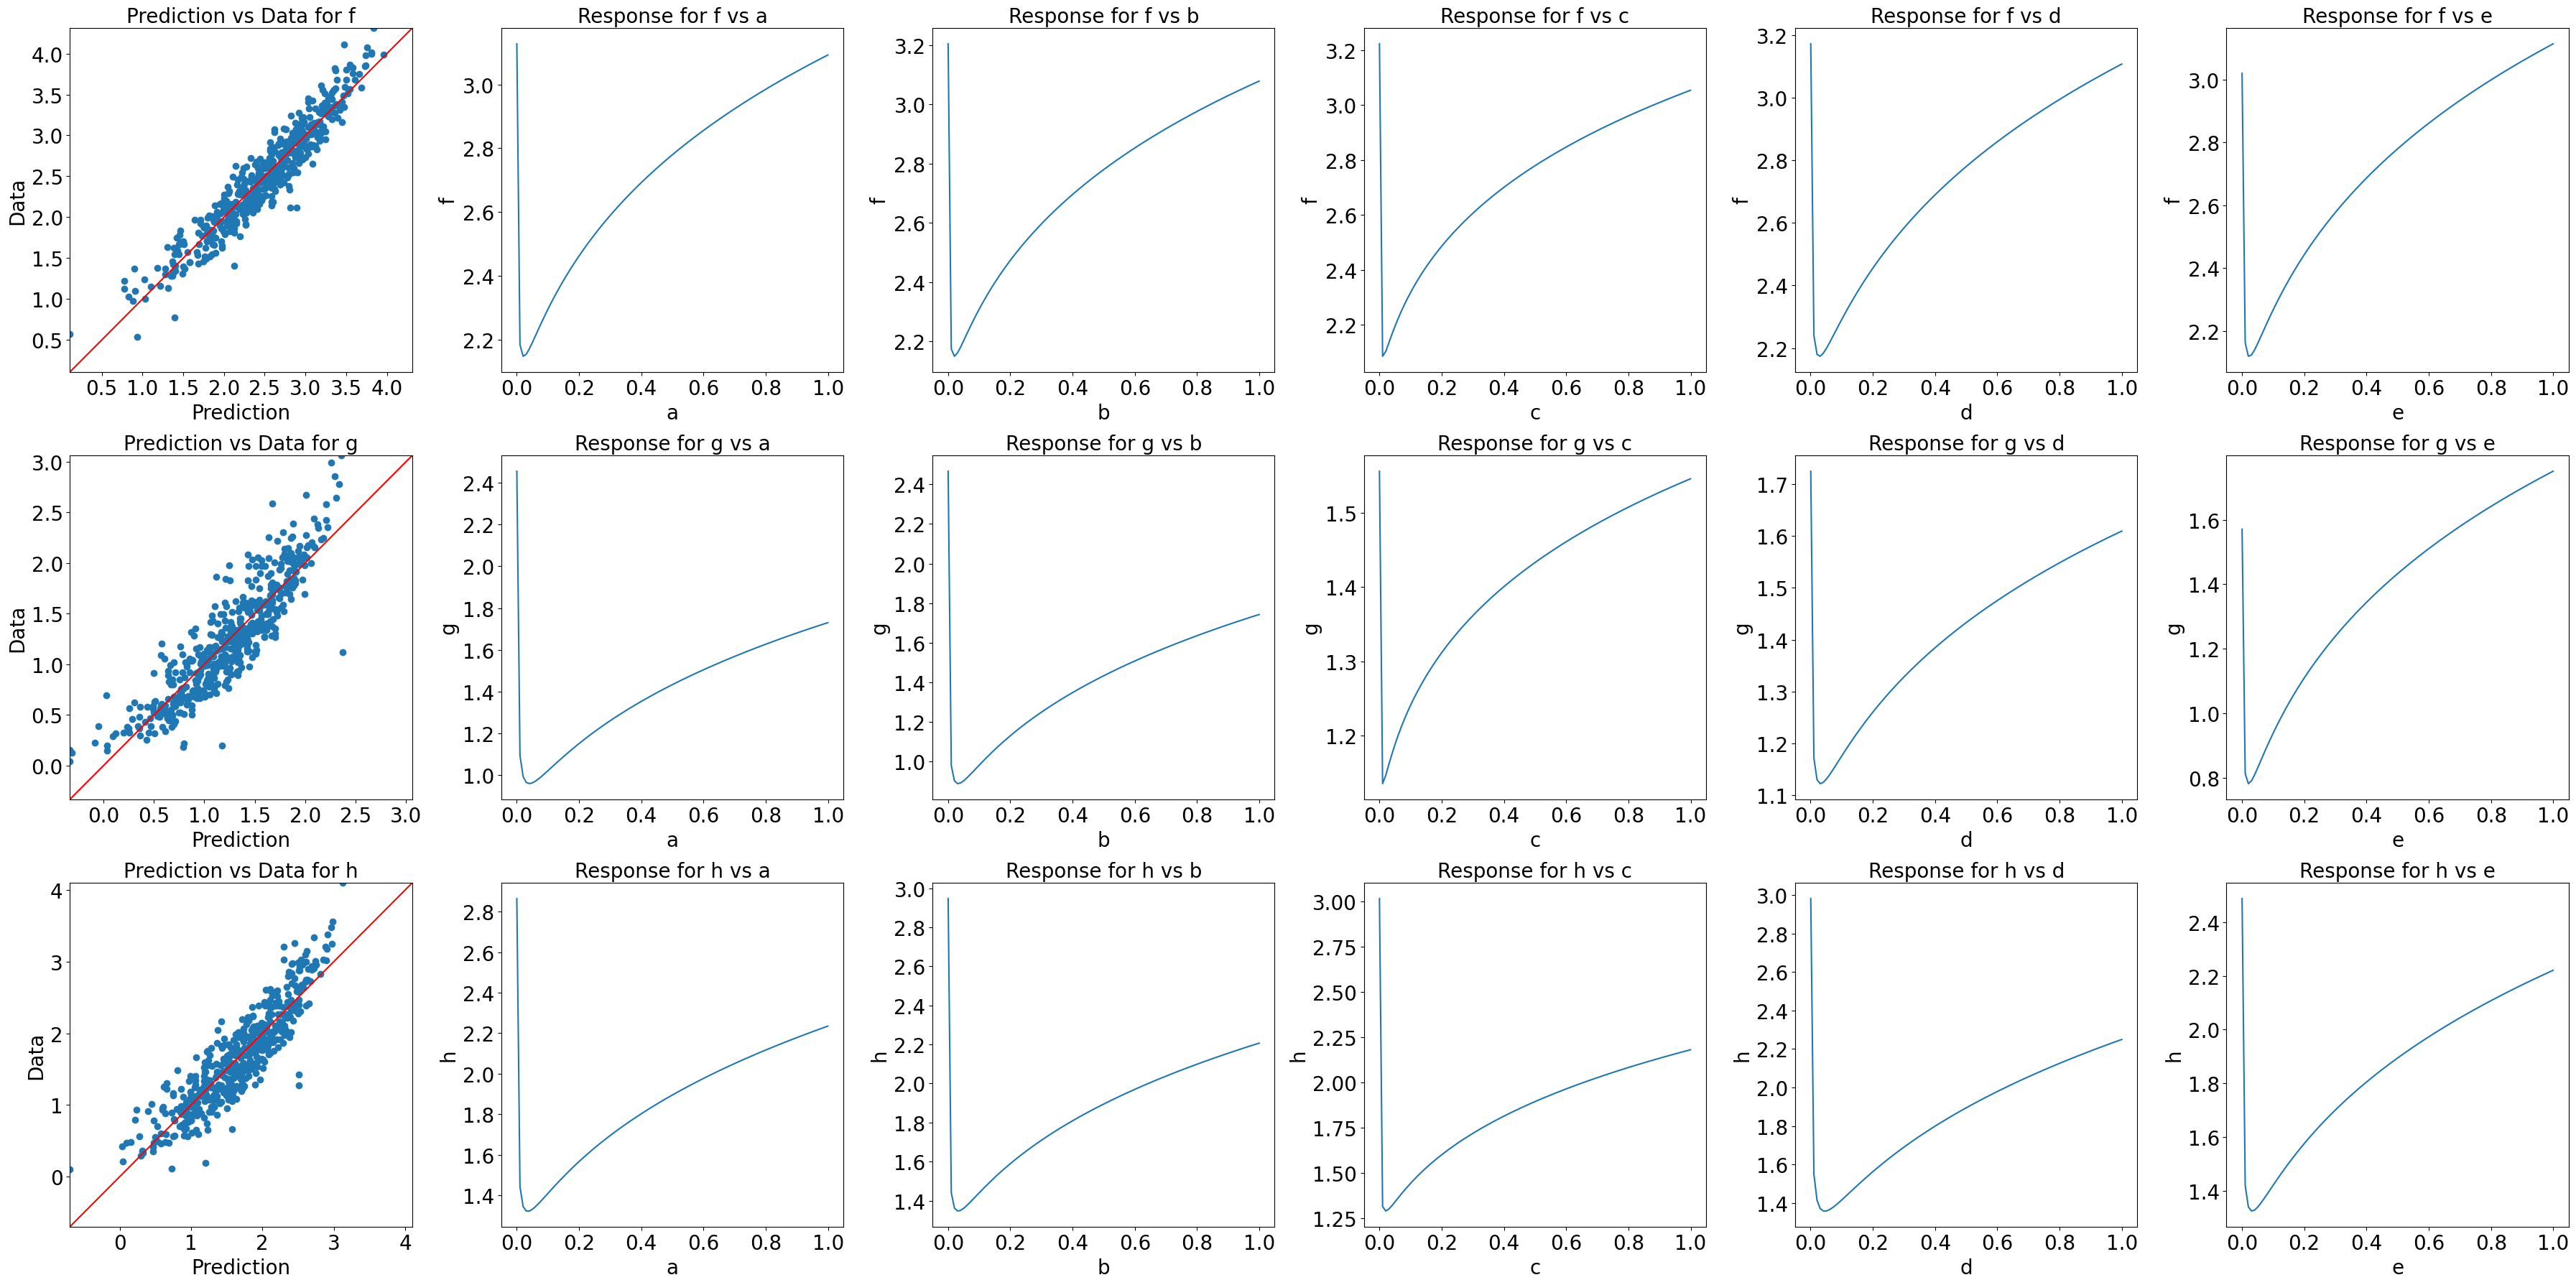

In [20]:
reg_data = PolynomialRegressionParameters(input_data=input_data, output_data=noisy_output_data, order=2)

regressor = PolynomialRegressor(reg_data)
regressor.fit()
print(f"Error: {regressor.error_metrics()['score']}")

params = RegressorPlotParameters(regressor, start, lower_bound, upper_bound)

reg_plot = RegressorPlot(params)

reg_plot.plot()

Cubic

Error: 0.9423803293133434


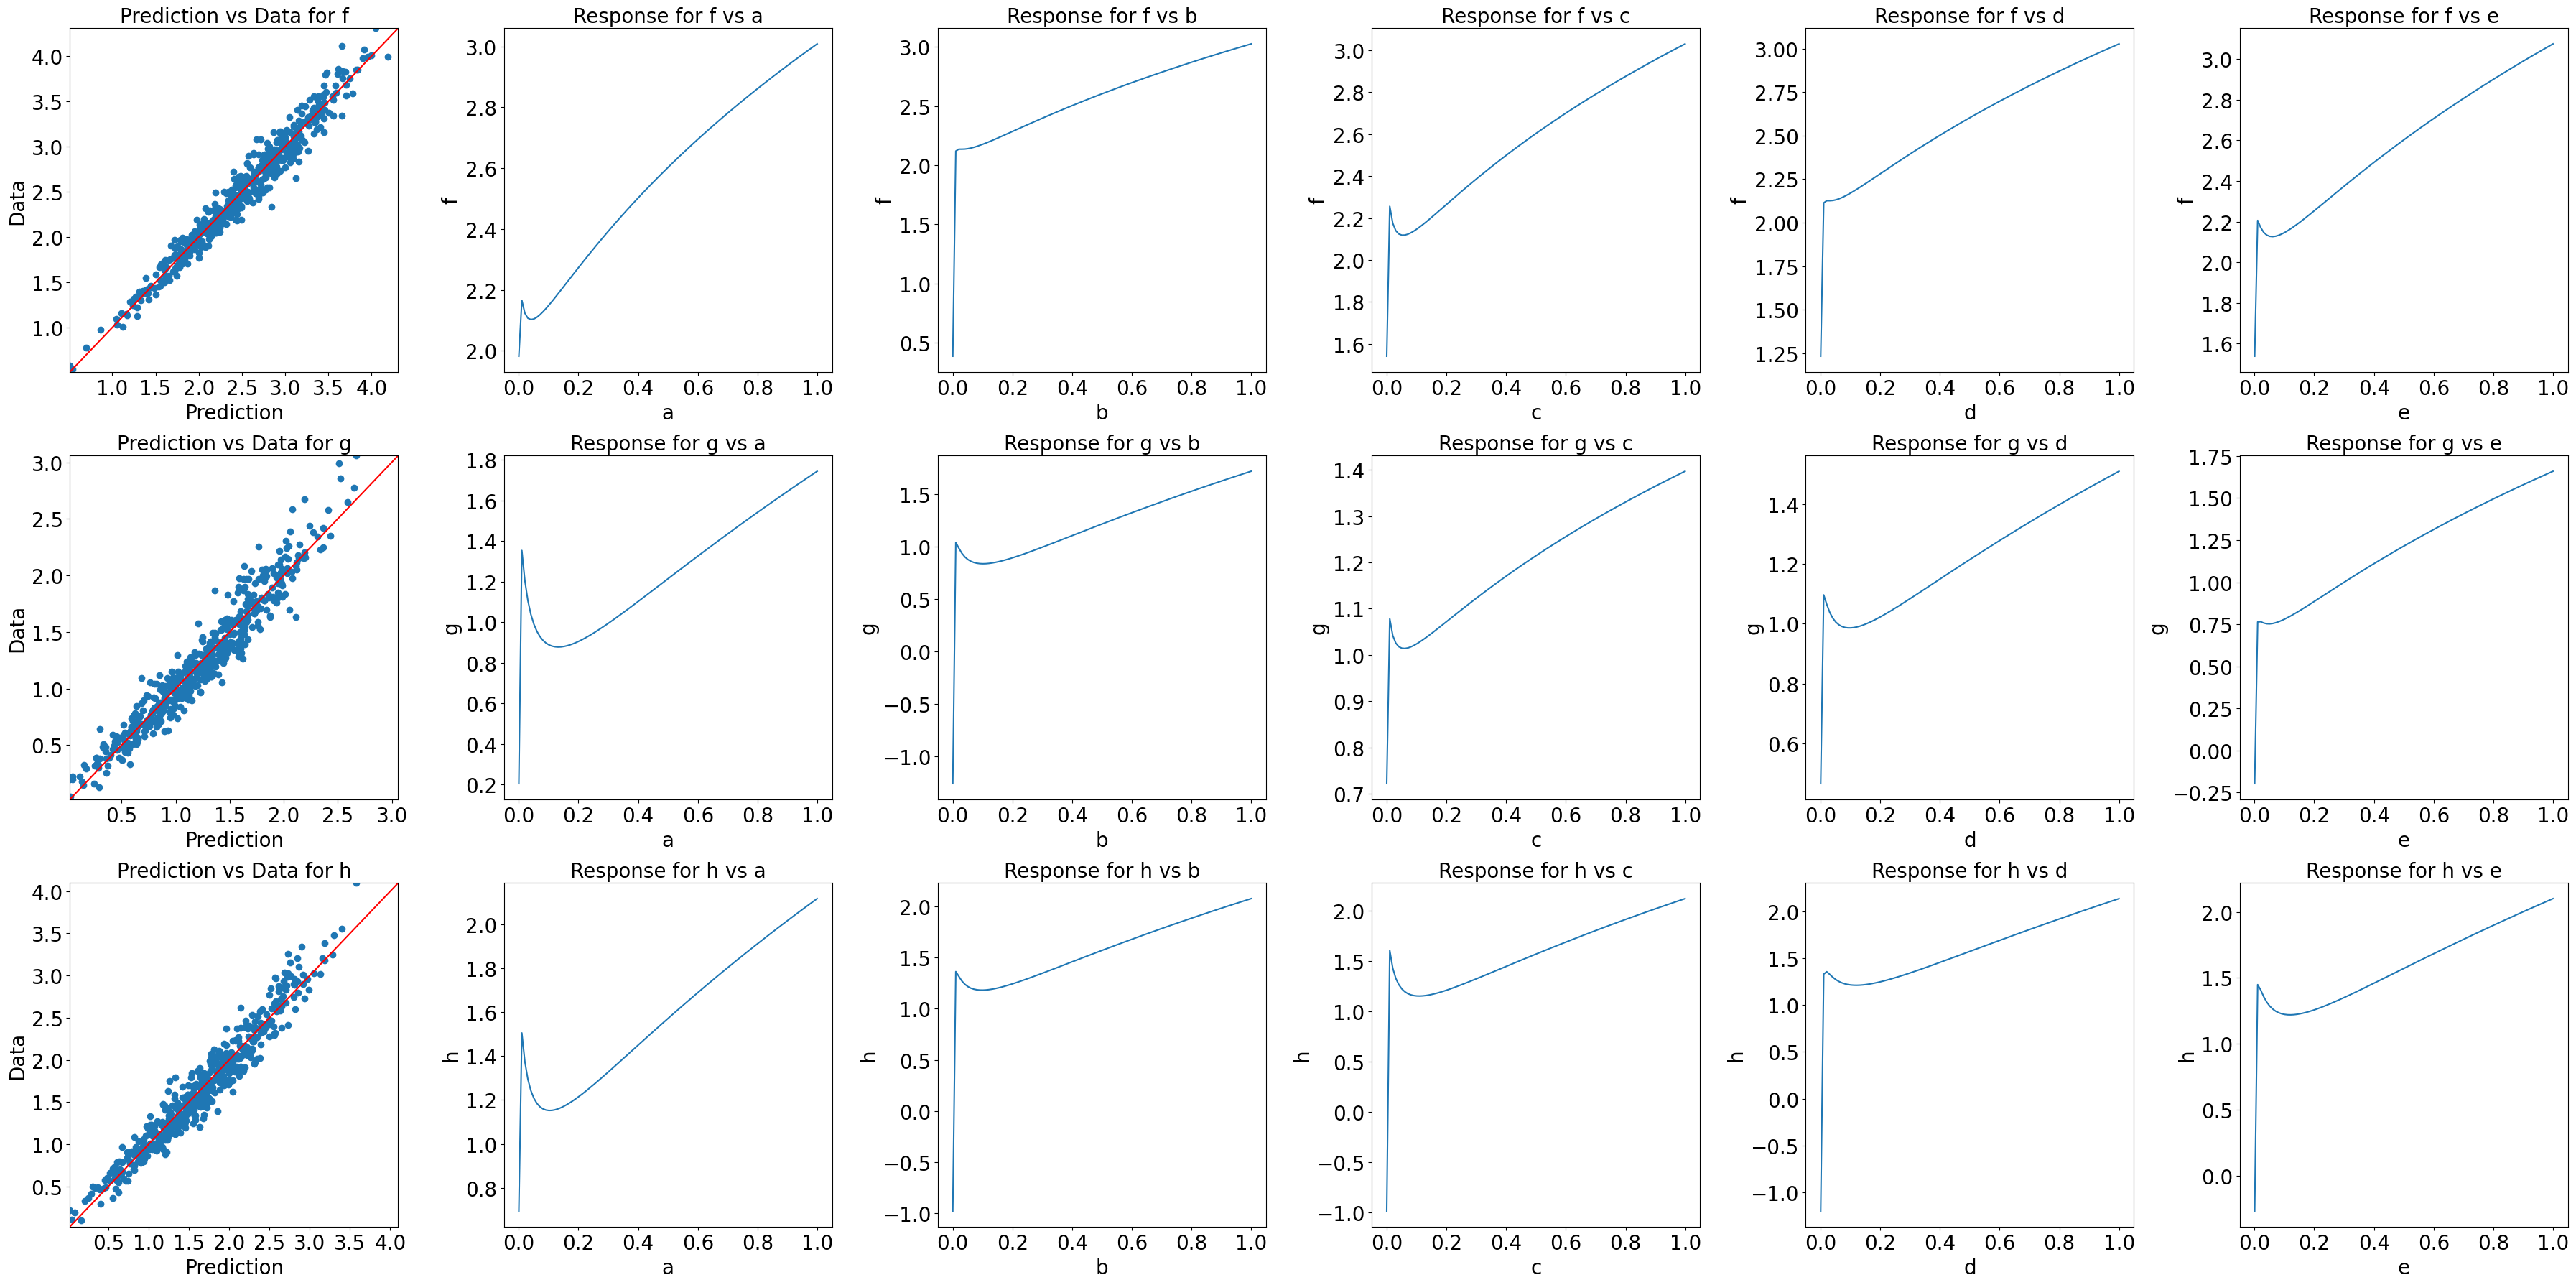

In [21]:
reg_data = PolynomialRegressionParameters(input_data=input_data, output_data=noisy_output_data, order=3)

regressor = PolynomialRegressor(reg_data)
regressor.fit()
print(f"Error: {regressor.error_metrics()['score']}")

params = RegressorPlotParameters(regressor, start, lower_bound, upper_bound)

reg_plot = RegressorPlot(params)

reg_plot.plot()

What happens if we use a much higher order polynomial?

In [22]:
reg_data = PolynomialRegressionParameters(input_data=input_data, output_data=noisy_output_data, order=7)

regressor = PolynomialRegressor(reg_data)
regressor.fit()
print(f"Error: {regressor.error_metrics()['score']}")

params = RegressorPlotParameters(regressor, start, lower_bound, upper_bound)

reg_plot = RegressorPlot(params)

reg_plot.plot()

ValueError: Number of samples 512 is less than or equal to the number of polynomial terms 792.

Notice the system raises an exception and tells you that there are not enough samples for this polynomial order.

In order to prevent overfitting some kind of regularization can be used. One of the methods is to use Lasso with cross-validation.

Error: 0.7574949266283578


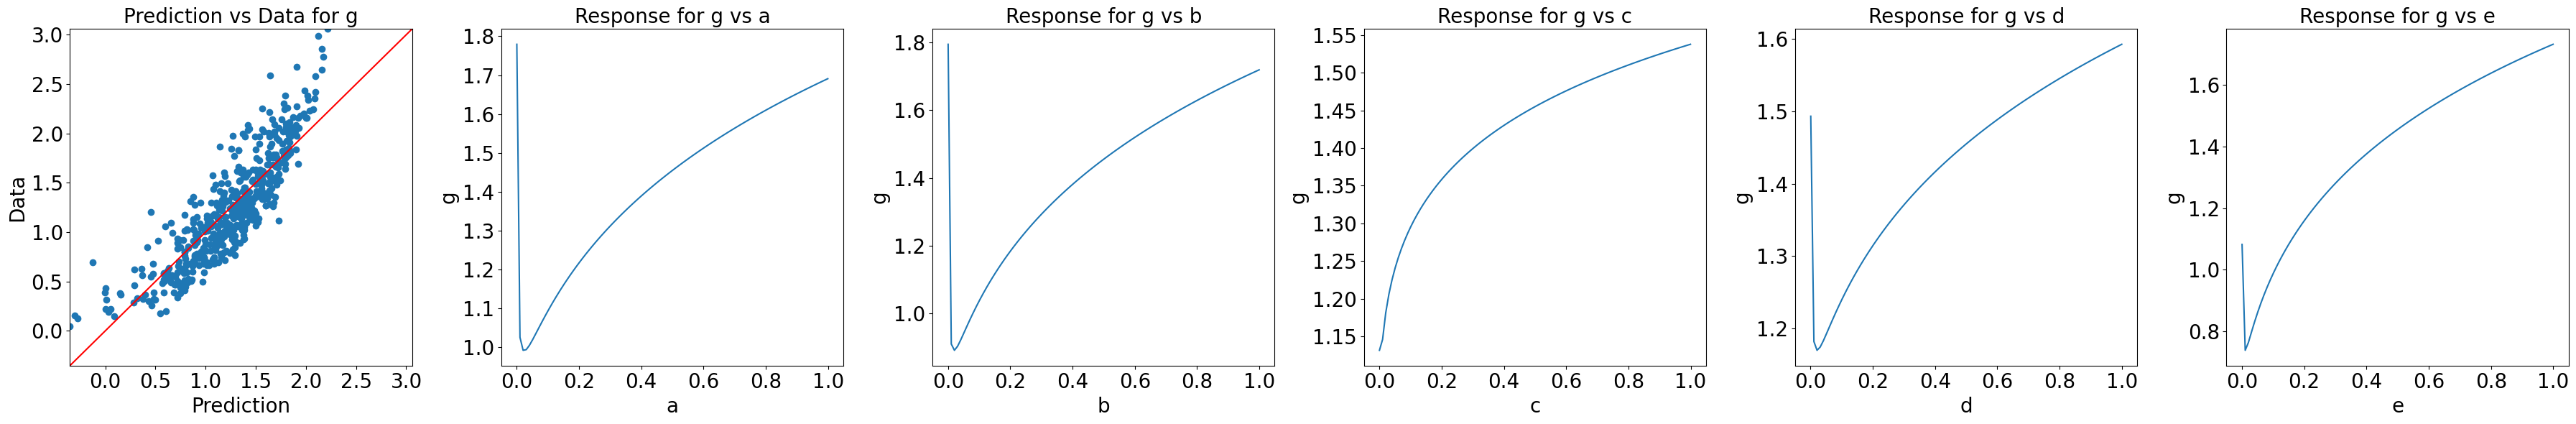

In [23]:
reg_data = LassoCVRegressionParameters(input_data=input_data, output_data=noisy_output_data['g'].to_frame(), order=2)

regressor = LassoCVRegressor(reg_data)
regressor.fit()
print(f"Error: {regressor.error_metrics()['score']}")

params = RegressorPlotParameters(regressor, start, lower_bound, upper_bound)

reg_plot = RegressorPlot(params)

reg_plot.plot()

Another method that can be used is Bayesian ridge regression.

/home/wheymann/mambaforge/envs/gumps_311/lib/python3.11/site-packages/sklearn/linear_model/_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/home/wheymann/mambaforge/envs/gumps_311/lib/python3.11/site-packages/sklearn/linear_model/_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/home/wheymann/mambaforge/envs/gumps_311/lib/python3.11/site-packages/sklearn/linear_model/_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


Error: 0.9382251824895104


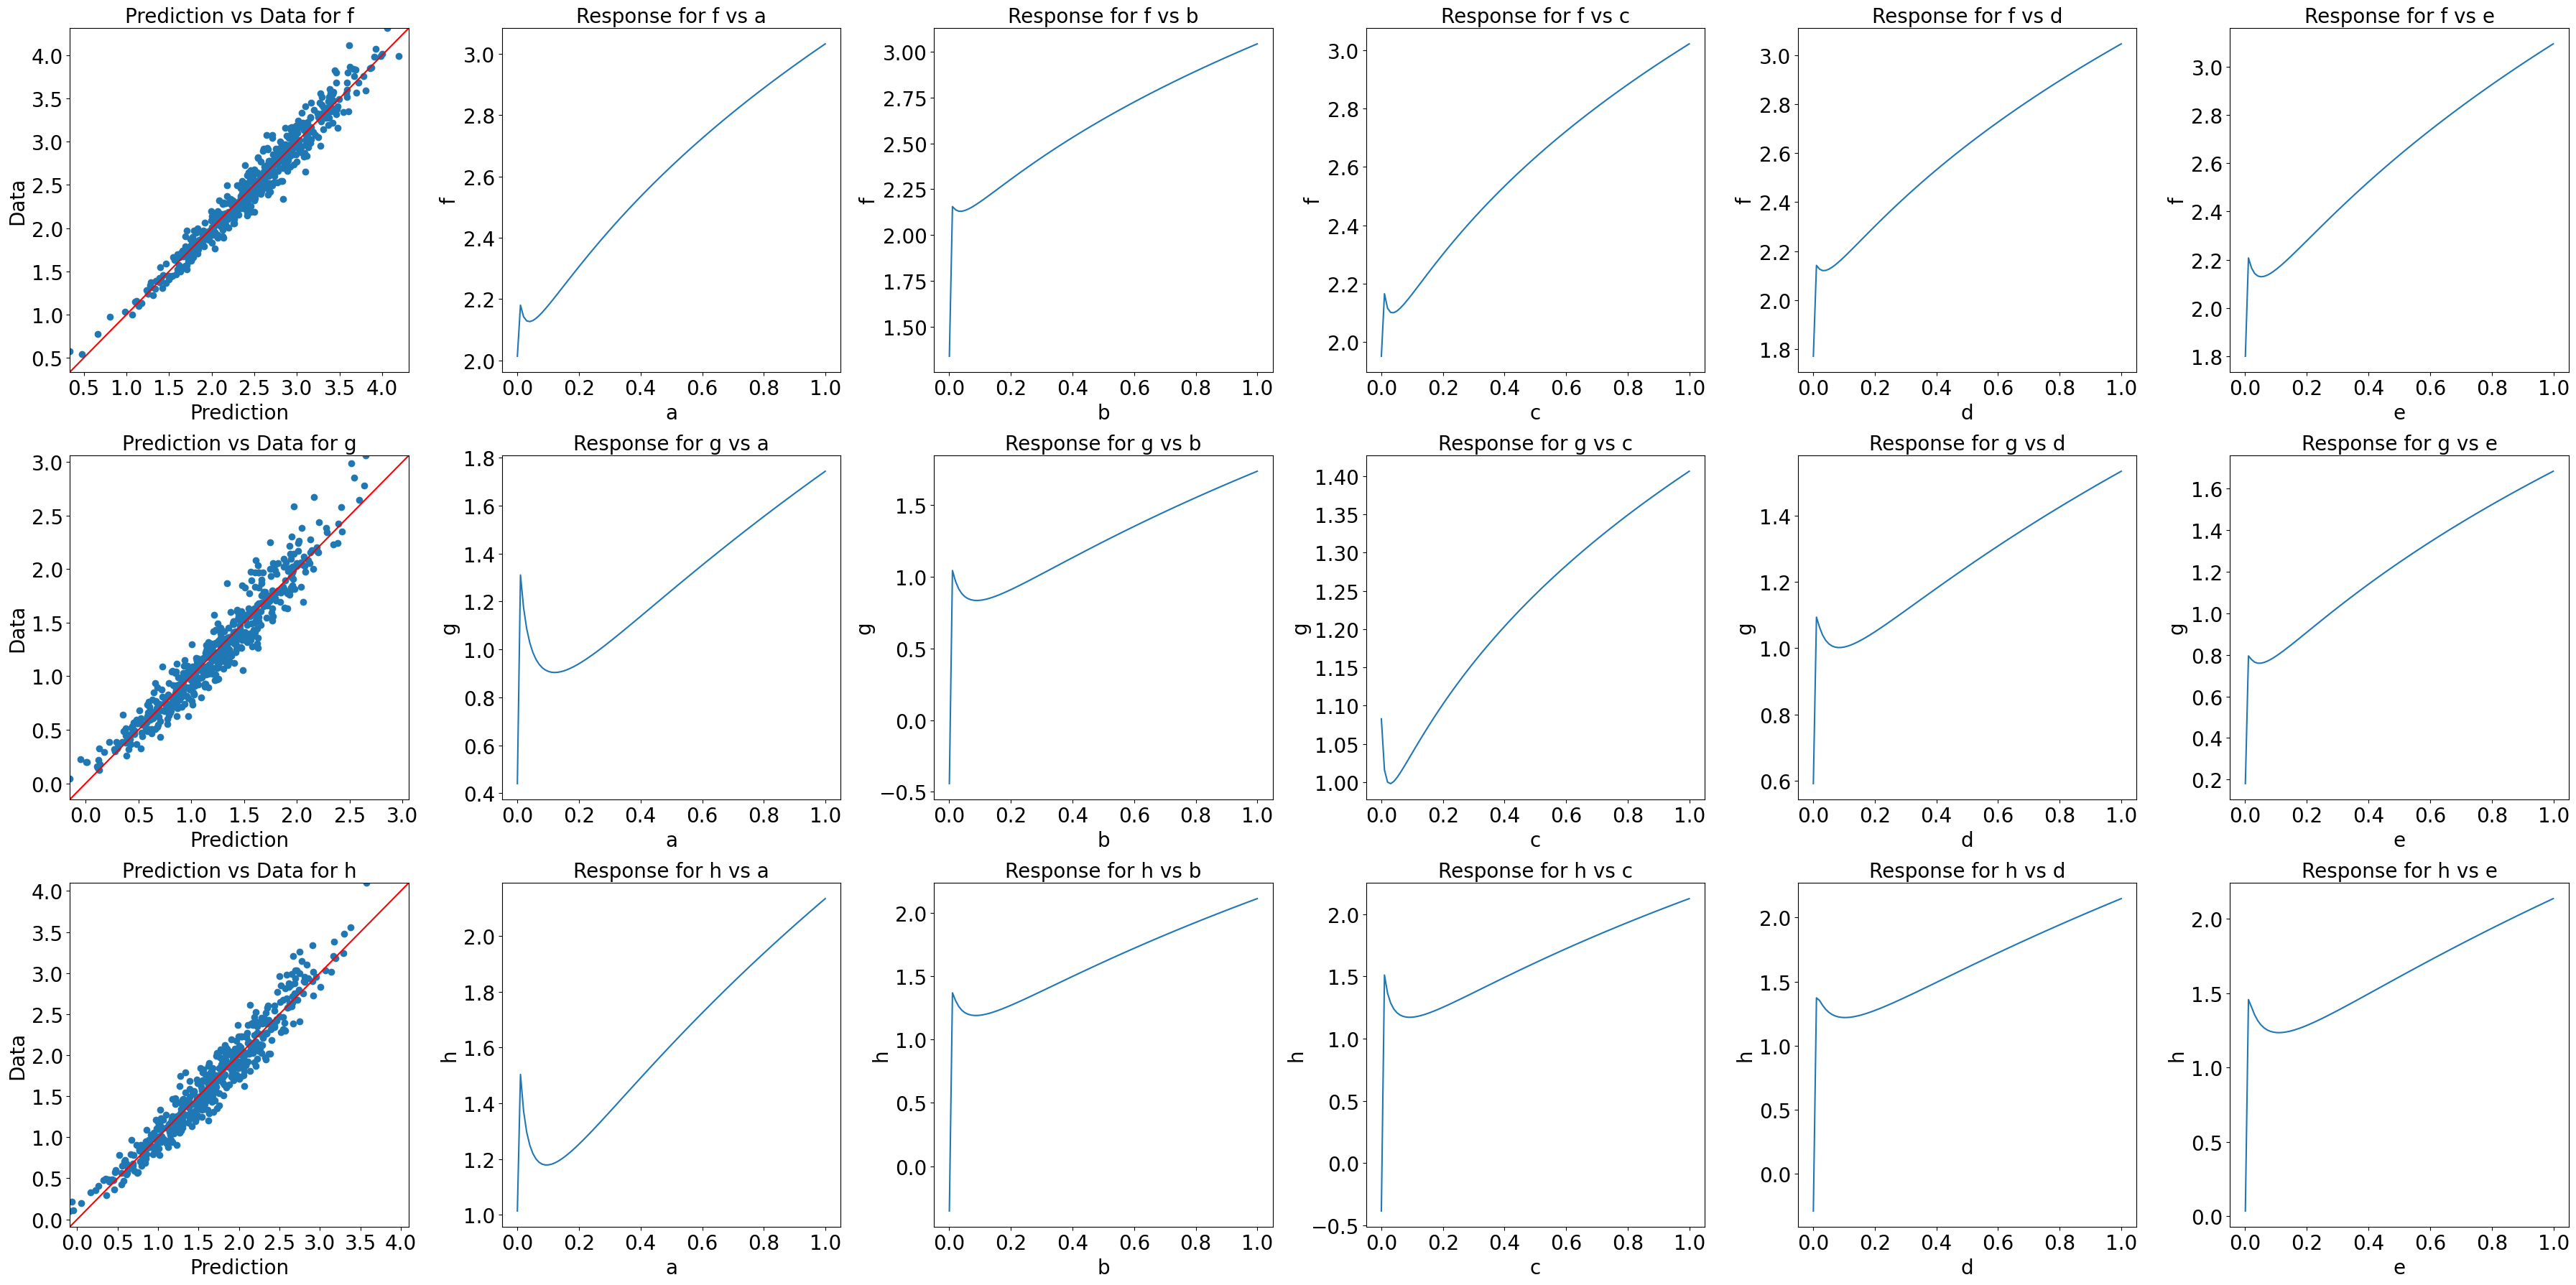

In [24]:
reg_data = BayesianRegressionParameters(input_data=input_data, output_data=noisy_output_data, order=3)

regressor = BayesianRegressor(reg_data)
regressor.fit()
print(f"Error: {regressor.error_metrics()['score']}")

params = RegressorPlotParameters(regressor, start, lower_bound, upper_bound)

reg_plot = RegressorPlot(params)

reg_plot.plot()

# Lets try using a Random Forest Regressor

Error: 0.9793172030772931


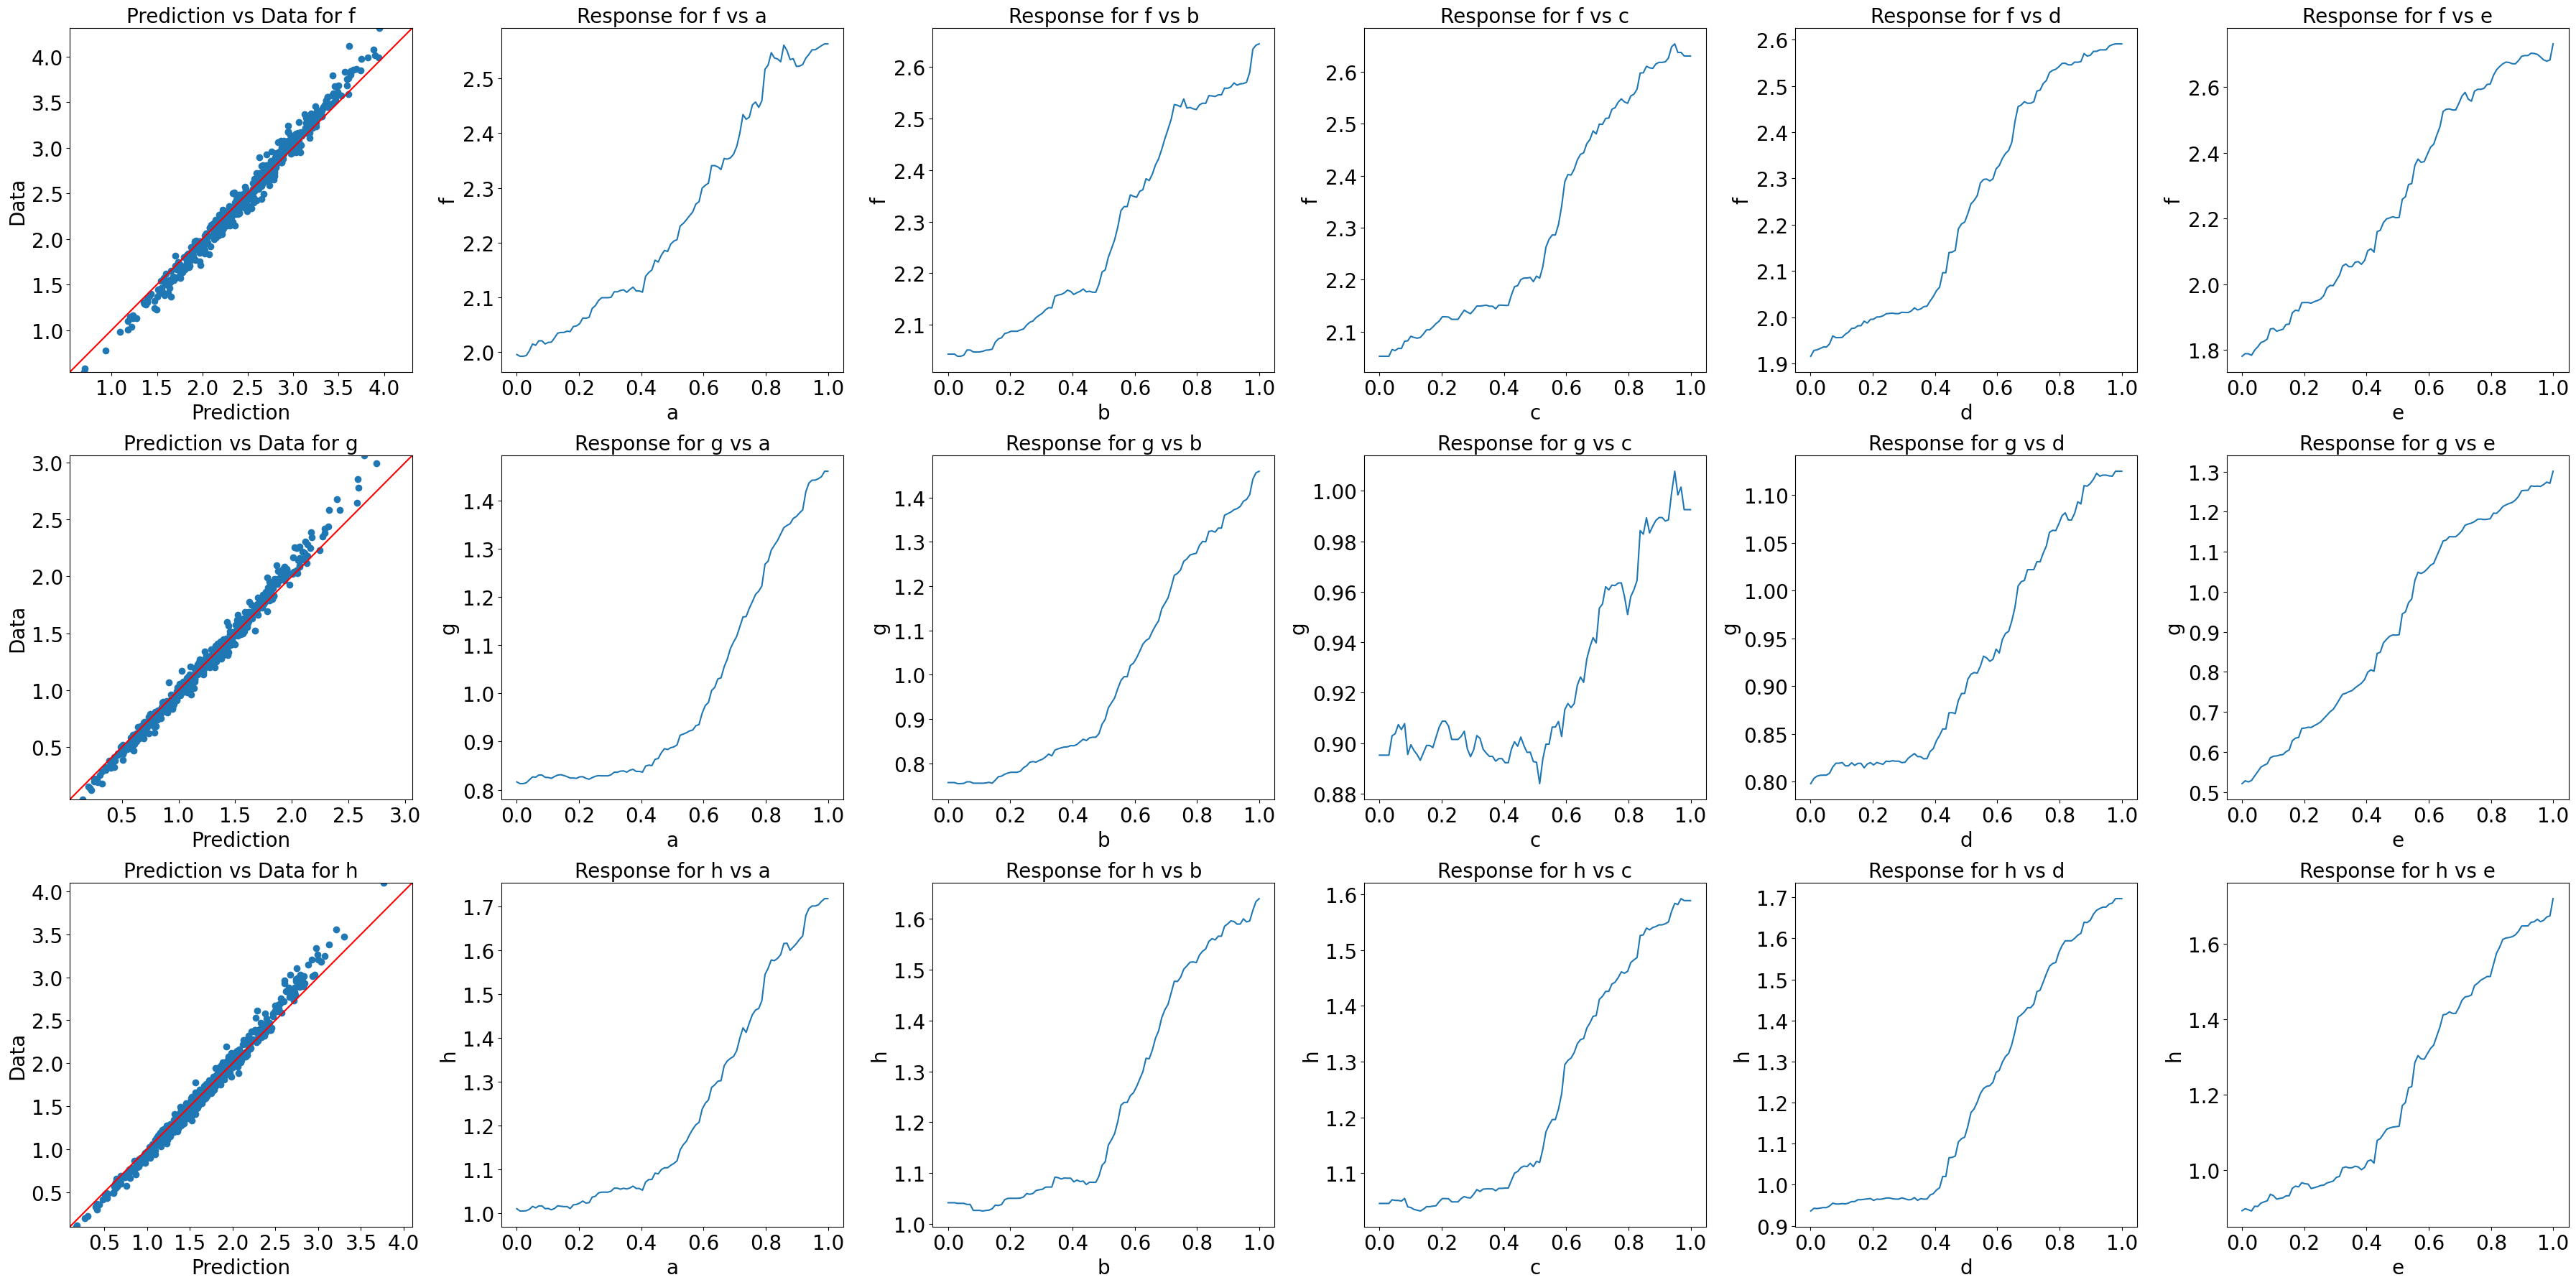

In [25]:
reg_data = RandomForestRegressionParameters(input_data=input_data, output_data=noisy_output_data)

regressor = RandomForestRegressor(reg_data)
regressor.fit()
print(f"Error: {regressor.error_metrics()['score']}")

params = RegressorPlotParameters(regressor, start, lower_bound, upper_bound)

reg_plot = RegressorPlot(params)

reg_plot.plot()

# What about the XGBoost Regressor?

[0]	validation_0-rmse:0.15680
[1]	validation_0-rmse:0.13010
[2]	validation_0-rmse:0.11004


/home/wheymann/mambaforge/envs/gumps_311/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:0.09763
[4]	validation_0-rmse:0.08815
[5]	validation_0-rmse:0.08219
[6]	validation_0-rmse:0.07660
[7]	validation_0-rmse:0.07263
[8]	validation_0-rmse:0.06870
[9]	validation_0-rmse:0.06697
[10]	validation_0-rmse:0.06532
[11]	validation_0-rmse:0.06380
[12]	validation_0-rmse:0.06272
[13]	validation_0-rmse:0.06200
[14]	validation_0-rmse:0.06150
[15]	validation_0-rmse:0.06111
[16]	validation_0-rmse:0.06065
[17]	validation_0-rmse:0.06017
[18]	validation_0-rmse:0.05988
[19]	validation_0-rmse:0.05958
[20]	validation_0-rmse:0.05952
[21]	validation_0-rmse:0.05942
[22]	validation_0-rmse:0.05937
[23]	validation_0-rmse:0.05929
[24]	validation_0-rmse:0.05918
[25]	validation_0-rmse:0.05914
[26]	validation_0-rmse:0.05910
[27]	validation_0-rmse:0.05908
[28]	validation_0-rmse:0.05909
[29]	validation_0-rmse:0.05906
[30]	validation_0-rmse:0.05910
[31]	validation_0-rmse:0.05910
[32]	validation_0-rmse:0.05908
[33]	validation_0-rmse:0.05909
[34]	validation_0-rmse:0.05898
[35]	validation

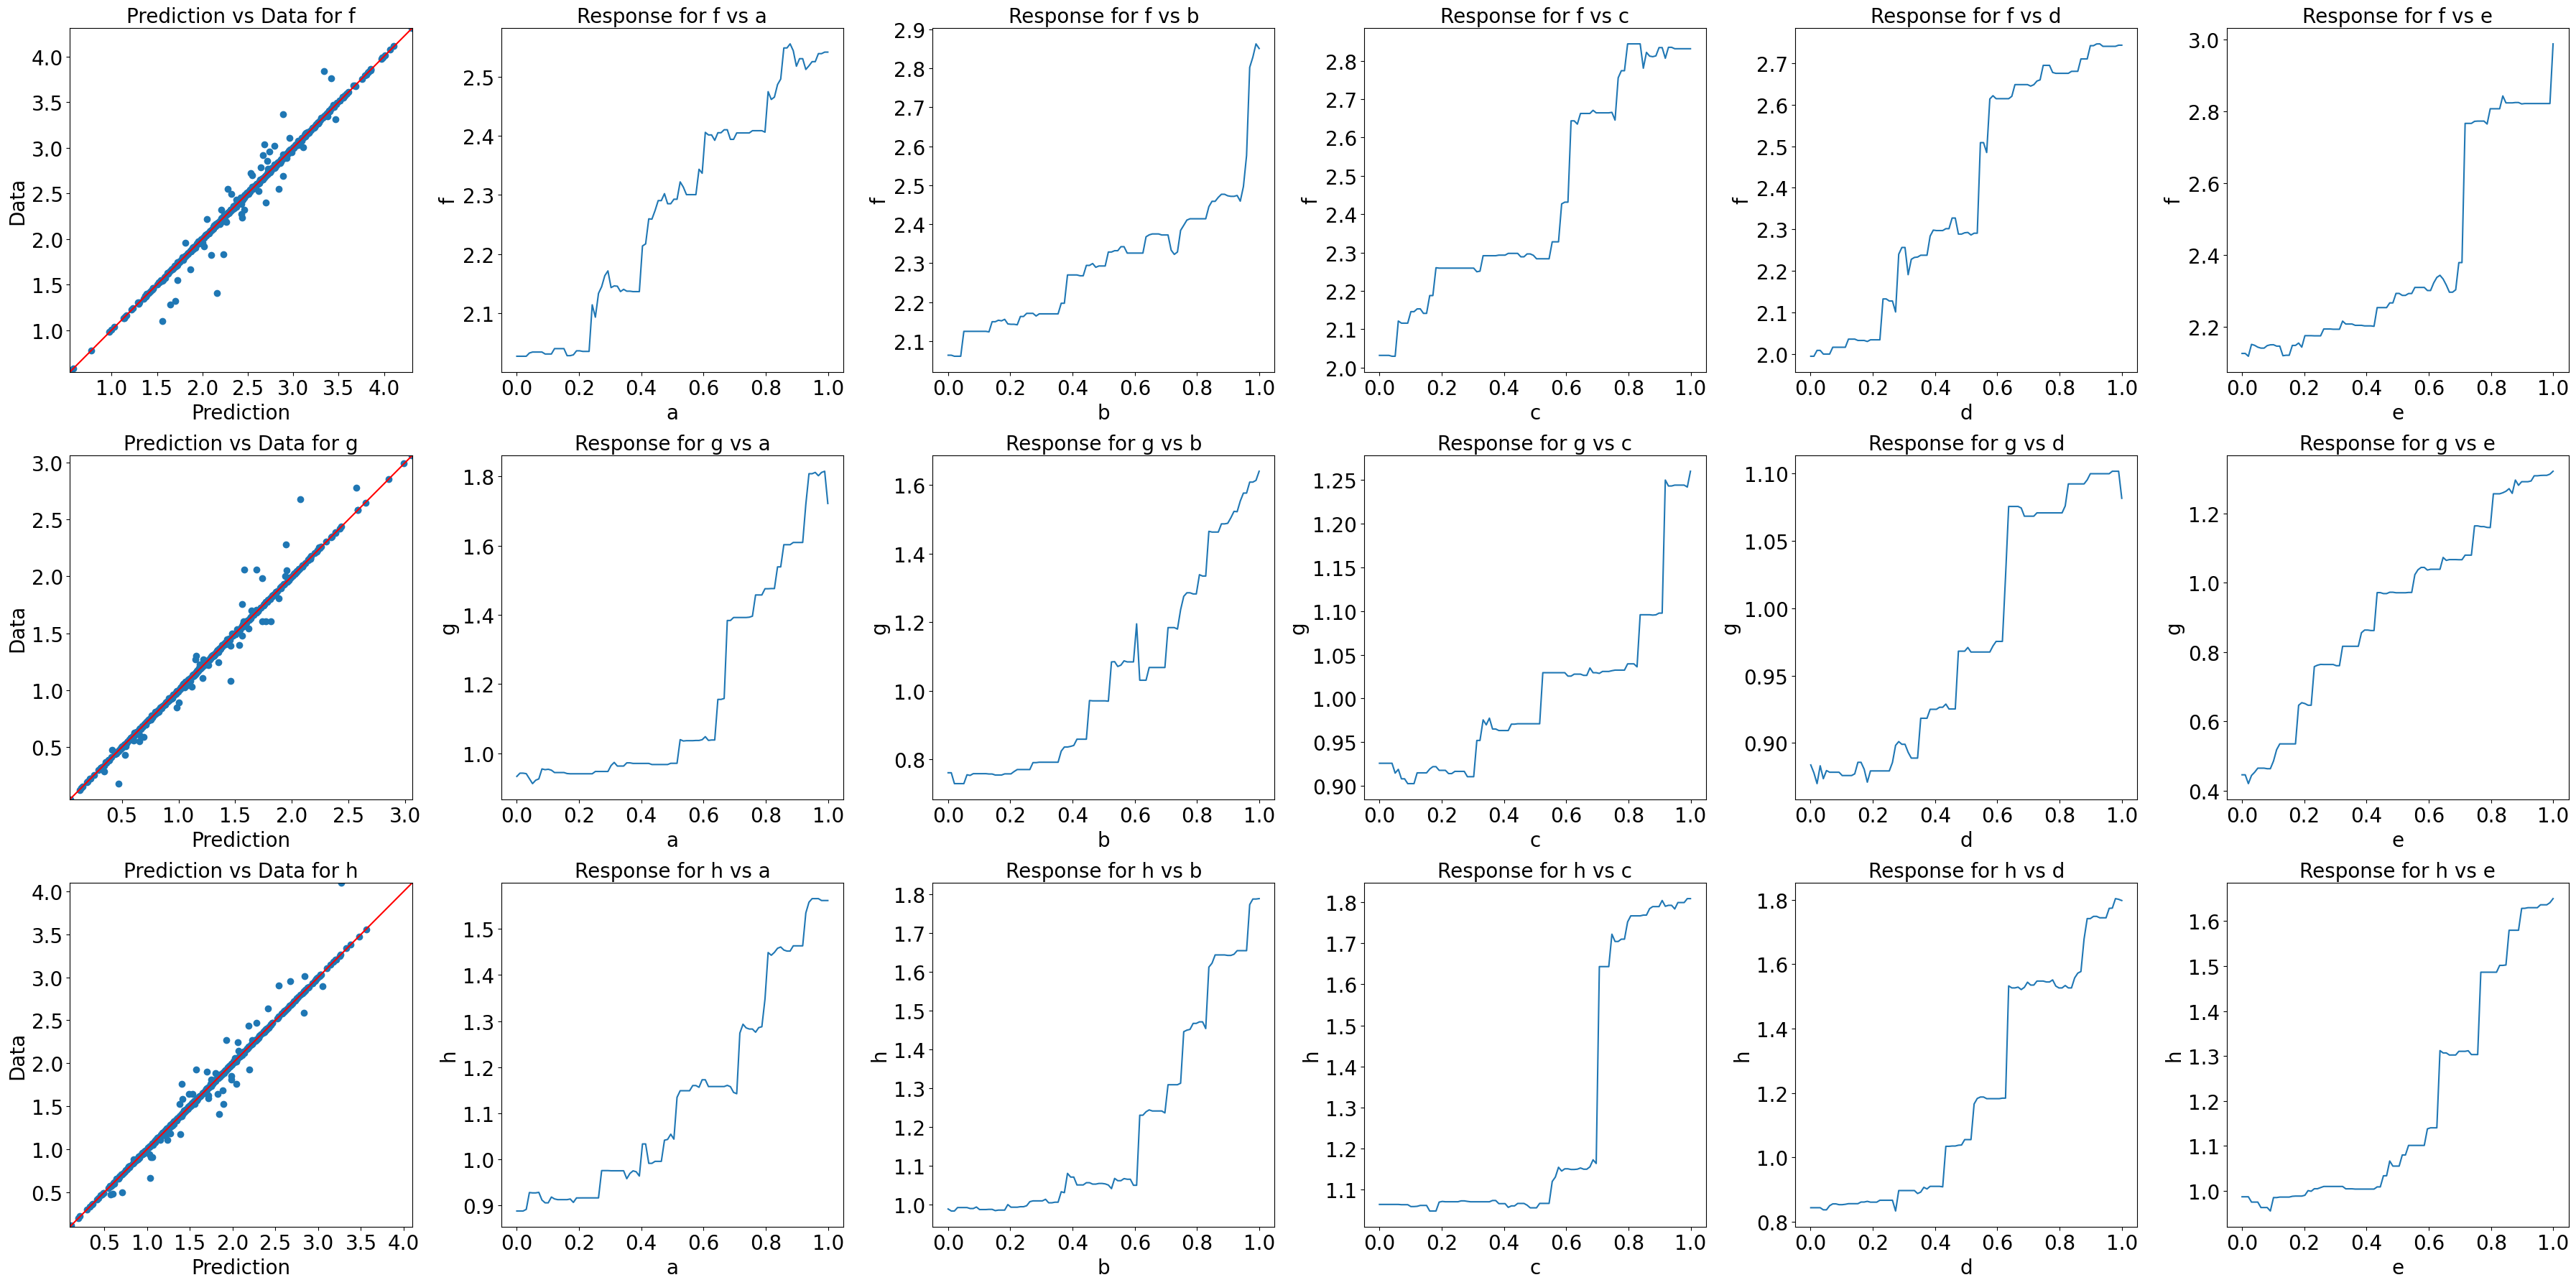

In [26]:
reg_data = XGBoostParameters(input_data=input_data, output_data=noisy_output_data)
reg_data.num_parallel_tree = 50
reg_data.n_estimators = 1000

regressor = XGBoostRegressor(reg_data)
regressor.fit()
print(f"Error: {regressor.error_metrics()['score']}")

params = RegressorPlotParameters(regressor, start, lower_bound, upper_bound)



reg_plot = RegressorPlot(params)

reg_plot.plot()